# Bank Customers Churn Prediction

## Introduction 

In the highly competitive banking industry, customer retention is paramount. Customer churn—the phenomenon where clients discontinue their relationship with a bank—poses significant challenges, leading to revenue loss and increased acquisition costs. Understanding and predicting which customers are likely to leave enables banks to implement targeted retention strategies, thereby enhancing customer loyalty and profitability. This project focuses on developing a predictive analytics model to identify potential churners within a bank's customer base, utilizing a comprehensive dataset encompassing demographic, financial, and behavioral attributes. 

## Problem Statement 

The primary objective of this project is to predict customer churn in a banking context by analyzing various factors that may influence a customer's decision to leave. By leveraging predictive analytics, the goal is to build a model that accurately identifies customers at high risk of churning. This proactive approach is crucial, as retaining existing customers is significantly more cost-effective than acquiring new ones. The insights derived from this model will be invaluable to the bank's customer relationship management (CRM) team, marketing strategists, and financial analysts. By identifying at-risk customers early, the CRM team can tailor personalized retention efforts, marketing can design targeted campaigns to re-engage these clients, and financial analysts can better forecast revenue impacts and allocate resources efficiently. Ultimately, this predictive model aims to reduce churn rates, enhance customer satisfaction, and improve the bank's financial performance. 

## Formulating the Problem with Predictive Analytics 

Predicting customer churn involves classifying customers into two categories: those who are likely to stay and those who are likely to leave. This binary classification problem can be addressed using various predictive modeling techniques. The dataset comprises features such as Credit Score, Geography, Gender, Age, Tenure, Balance, Number of Products, HasCrCard, IsActiveMember, Estimated Salary, and a Churn Label indicating the customer's status. The predictive model will analyze these features to discern patterns and correlations associated with churn behavior. By training the model on historical data where the churn outcome is known, it can learn to predict the likelihood of churn for current customers. This approach enables the bank to proactively identify and engage with at-risk customers, deploying targeted interventions to mitigate potential churn. 

In summary, this project aims to harness predictive analytics to tackle the pressing issue of customer churn in the banking sector. By developing a robust model to forecast churn, the bank can implement strategic measures to retain valuable customers, thereby securing its competitive position and ensuring sustained financial growth. 

## Background Information
Churn, according to [Merriam Webster Dictionary](https://www.merriam-webster.com/dictionary/churn), is defined aa a regular, quantifiable process or rate of change that occurs in a business over a period of time as existing customers are lost and new customers are added. The more customers you lose, the more revenue you lose and by inference, the lesser profit you make. In the context of this project, we focus on a bank's customers. The customer churn in this project, then, refers to the rate at which customers stop using a bank's services (e.g. close their account).

The purpose of this project is to predict the probability that a customer will churn based on their historical data. The intended audience for this project are bank executives who can use this model to identify high-risk customers, prioritize, and make decisions for customer retention campaigns.

## Data Summary
This dataset is publicly available on [Kaggle](https://www.kaggle.com/datasets/alyelbadry/churn-modelling-cluster-training). It is open-source through the [Apache 2.0](https://www.apache.org/licenses/LICENSE-2.0) License. It contains demographic, account, and financial data on 10,000 customers with 11 relevant columns. The description of the relevant columns are as follows:

**Demographics:** 
* Information such as Gender, Age, and Geographic Location (country)

**Financial Data:**
* Credit Score: creditworthiness.
* Balance: Account balance details.
* Estimated Salary: Customers' earning potential.

**Account Features:**
* Number of Products: Number of products the customer is subscribed to (e.g., savings accounts, loans).
* IsActiveMember: Indicates if the customer is actively using the bank’s services.
* HasCrCard: Identifies customers with a credit card.
* Tenure: Duration (in years) the customer has been associated with the bank.

**Churn label (Prediction Target):**
* Exited: A binary indicator specifying whether the customer exited (1) or stayed (0).

*The data contains three additional columns (Row number, Customer ID, Customer Surname), which are not relevant to the prediction model.*

## Data Loading
First, we pip install the libraries we need in case they are not present in the environment. Next, we import these libraries into the Jupyter notebook. Finally we load the data into a Pandas dataframe.

In [1]:
# pip install required modules
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install plotly
%pip install scikit-learn
%pip install statsmodels
%pip install kagglehub
%pip install patsy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# import modules to restart kernel
from time import sleep
import IPython
import os
# Function to restart kernel after pip install
def restart_kernel():
    print("Restarting kernel...")
    # Send a command to restart the kernel
    IPython.display.display(IPython.display.Javascript("Jupyter.notebook.kernel.restart()"))
    
    # Wait for the kernel to restart
    kernel_restarting = True
    while kernel_restarting:
        try:
            # Try executing some Python code to check if the kernel has restarted
            sleep(3)  # Wait a few seconds
            _ = os.getpid()  # Check if kernel is responding
            kernel_restarting = False  # If this executes, the kernel is back
        except:
            # If there's an error, the kernel hasn't restarted yet
            kernel_restarting = True

    print("Kernel restarted successfully!")

# Call the function
restart_kernel()

Restarting kernel...


<IPython.core.display.Javascript object>

Kernel restarted successfully!


In [3]:
# import relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from itertools import combinations
import kagglehub
import patsy

In [4]:
# load data from Kaggle
# if it fails, load the local version
try:
    kaggle_data_path = kagglehub.dataset_download(handle="alyelbadry/churn-modelling-cluster-training")
    churn_df = pd.read_csv(f'{kaggle_data_path}/Churn_Modelling.csv')
    print('Data downloaded from Kaggle')
except:
    churn_df = pd.read_csv('Churn_Modelling.csv')
    print('Local data loaded')

Data downloaded from Kaggle


## Data Inspection
We inspect the dataframe to understand the data structure and identify any cleaning operations needed. We check for nulls, duplicates, and data types. We also extract the statistical summaries of the data for a preliminary understanding of the data distribution.

In [5]:
# first five rows
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# data overview - nulls and datatypes
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# check for duplicates
churn_df.duplicated().sum()

0

In [8]:
# numerical summary
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
# string summary
churn_df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


## Data Cleaning
There are no nulls or duplicates within the data. However, we need to clean the data by removing the unnecessary columns and converting the data types of the columns to the appropriate data types.

In [10]:
# create a copy of the data for cleaning
churn_df_clean = churn_df.copy()

### Treat Customer Identifiers

In [11]:
# drop row number and surname column
churn_df_clean.drop(columns=['RowNumber', 'Surname'], inplace=True)

# set customer id as dataframe index
churn_df_clean.set_index('CustomerId', inplace=True)

### Convert datatypes

In [12]:
# create dictionary mapping to convert binary values to human-friendly strings
string_mapping = {0:'No', 1:'Yes'}

# convert geography, gender, hasCrCard, IsActiveMember, Exited to category datatypes
category_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
churn_df_clean[category_cols] = churn_df_clean[category_cols].apply(lambda col: pd.Categorical(col.replace(string_mapping)))

## Exploratory Data Analysis (EDA)
We used a three-step approach for the EDA.
1. Univariate EDA to summarize, visualize, and describe the distribution of a single variable. We visualized the frequency distribution of continuoua variables with histograms & discrete and categorical variables with bar plots.
2. Bivariate EDA to explore the relationship between two variables. We explored the relationships between the categorical variables and churn. We also explored the correlations between the numeric variables and their relationships with churn.
3. Multivariate EDA to explore the relationships between the numeric variables and how they relate to the churn (exit).

The univariate and bivariate plots for each variable is plotted together.

In [13]:
# select category and numerical columns
category_cols = churn_df_clean.select_dtypes(include=['category']).columns
numerical_cols = churn_df_clean.select_dtypes(include=['number']).columns

# Store target and its color legend
target_column = 'Exited'
target_colors = {"No": "lightgrey", "Yes": "darkblue"}
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in target_colors.values()]
legend_labels = list(target_colors.keys())

### Category Variables

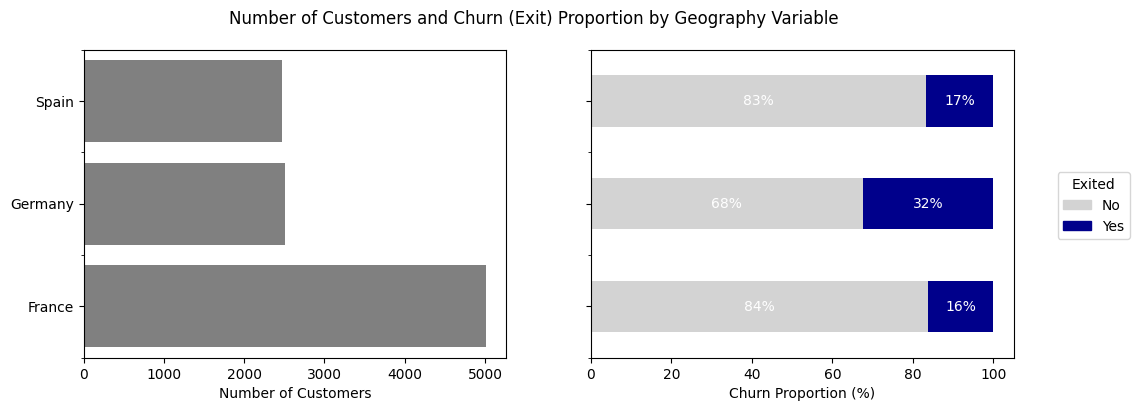

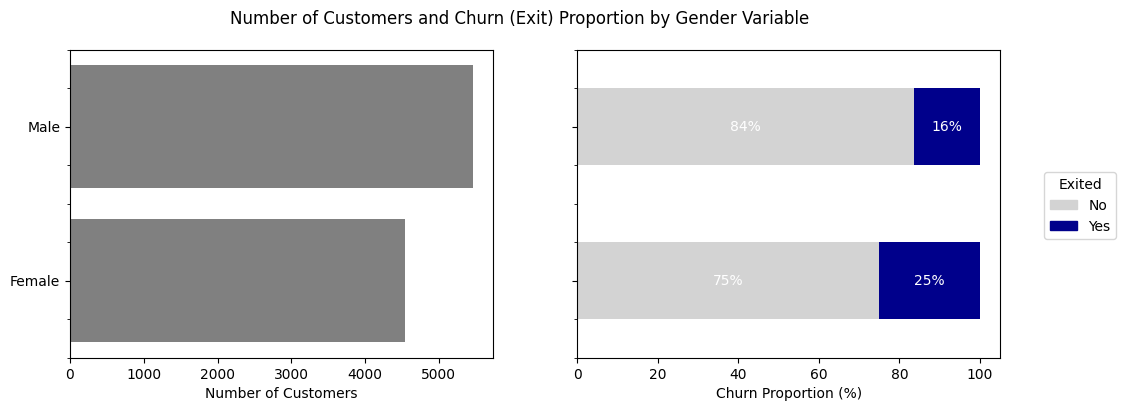

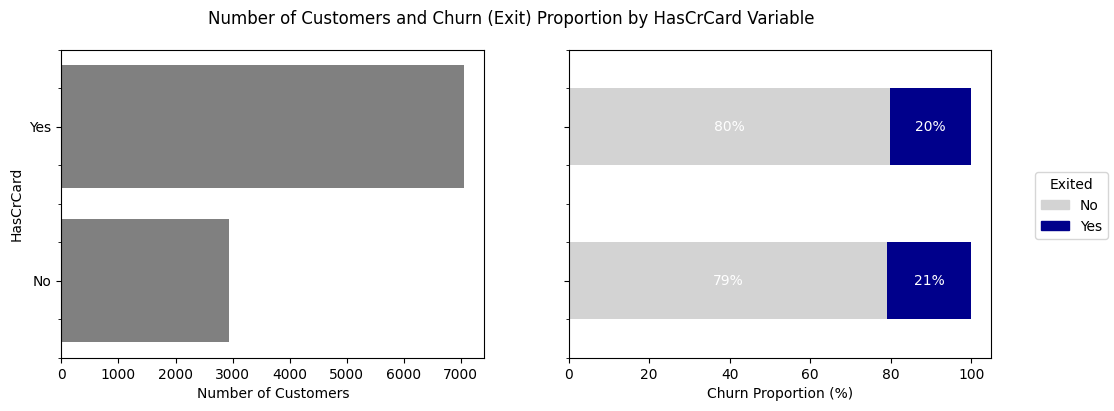

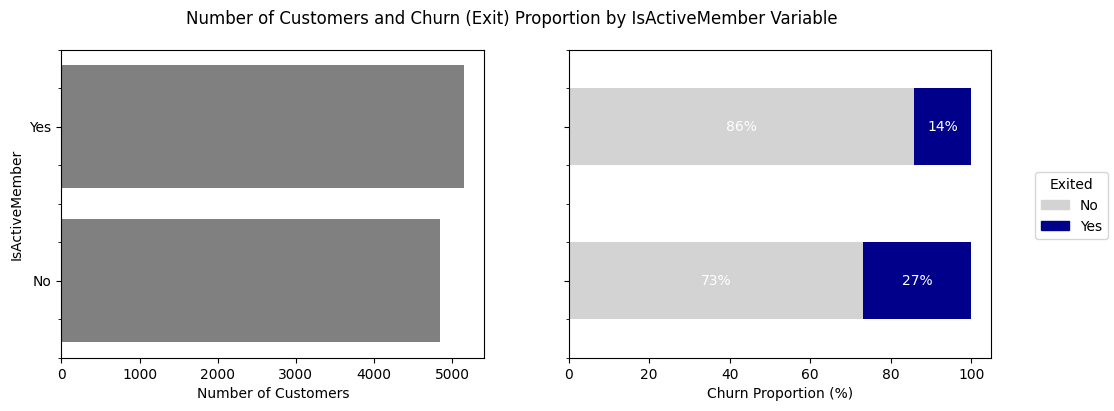

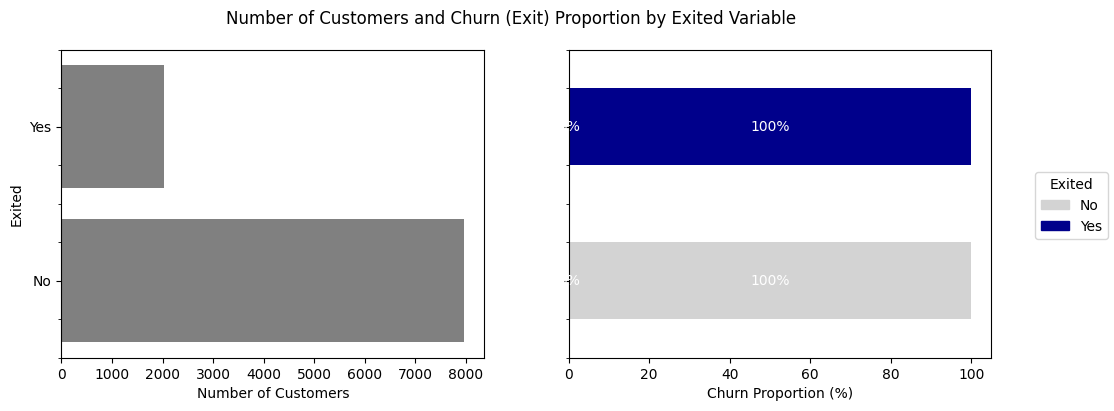

In [14]:
# for each category variable
for variable in category_cols:
    # set the figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    fig.suptitle(f'Number of Customers and Churn (Exit) Proportion by {variable} Variable')

    # first plot - univariate frequency; include custom x-label
    sns.countplot(data=churn_df_clean, y=variable, ax=axes[0], color="grey")
    axes[0].set_xlabel('Number of Customers')

    # calculate the proportion of churn
    churn_counts = churn_df_clean.groupby([variable, target_column], observed=False).size().unstack()
    # Normalize to 100%
    churn_proportions = churn_counts.div(churn_counts.sum(axis=1)/100, axis=0)
    
    # second plot - churn proportion; include custom x-label
    churn_proportions.plot(kind='barh', stacked=True, ax=axes[1], 
                            color=[target_colors[col] for col in churn_proportions.columns], legend=False)
    axes[1].set_xlabel("Churn Proportion (%)")
    
    # Add a single legend outside the plots (to the right) for the target legend
    fig.legend(legend_handles, legend_labels, title="Exited", loc='center right')

    # Add labels inside the stacked bars
    for container in axes[1].containers:
        axes[1].bar_label(container, fmt="%.0f%%", label_type="center", color='white', fontsize=10)

    # remove ylabel for geography and gender
    if variable in ['Geography', 'Gender']:
        axes[0].set_ylabel(None)
        axes[1].set_ylabel(None)

#### Insights
1. France has more customers than Germany and Spain combined. However, more customers exit from the Germany branch of the bank.
2. There are slightly more male than female customers but females exit more than males.
3. The majority of the bank customers have credit cards but there is no visible difference in churn proportion between customers with and without credit cards.
4. There is a similar number of active and inactive customers in the bank, and the churn rate is higher for inactive customers.
5. The majority of the bank customers stay with the bank, indicating an imbalance between the number of customers who stay and those who exit.

### Numerical Variables

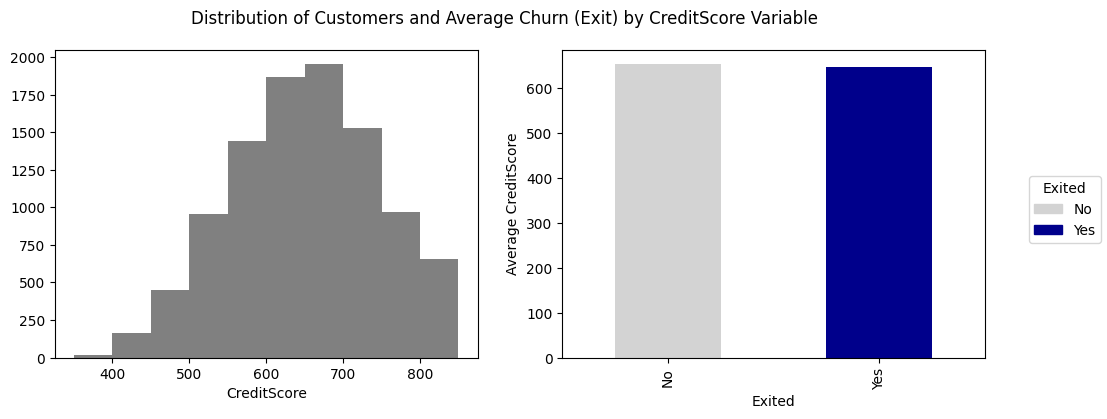

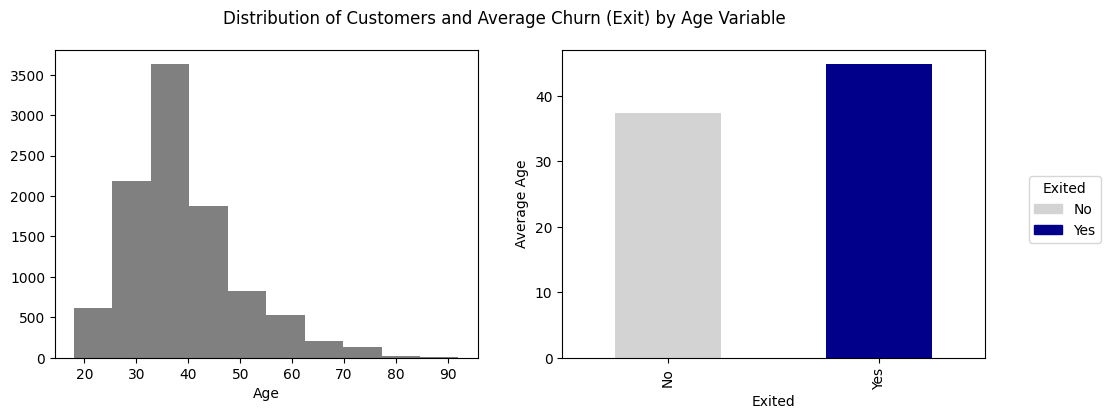

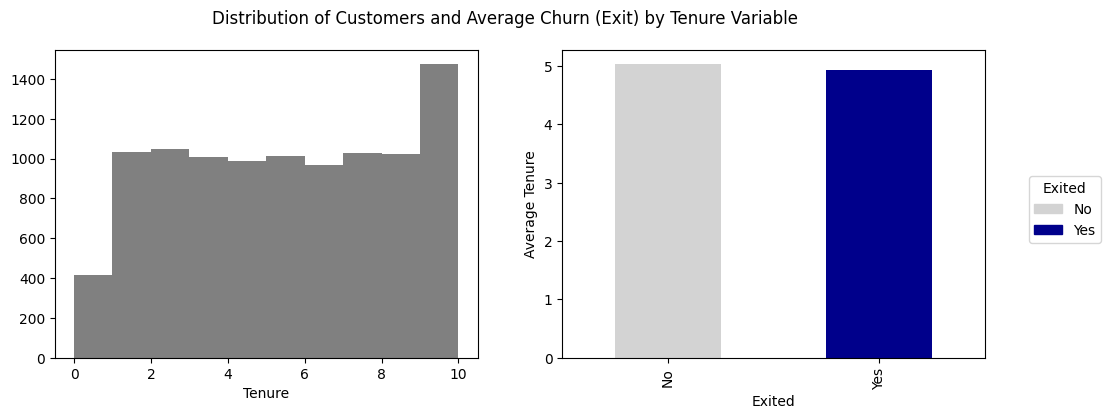

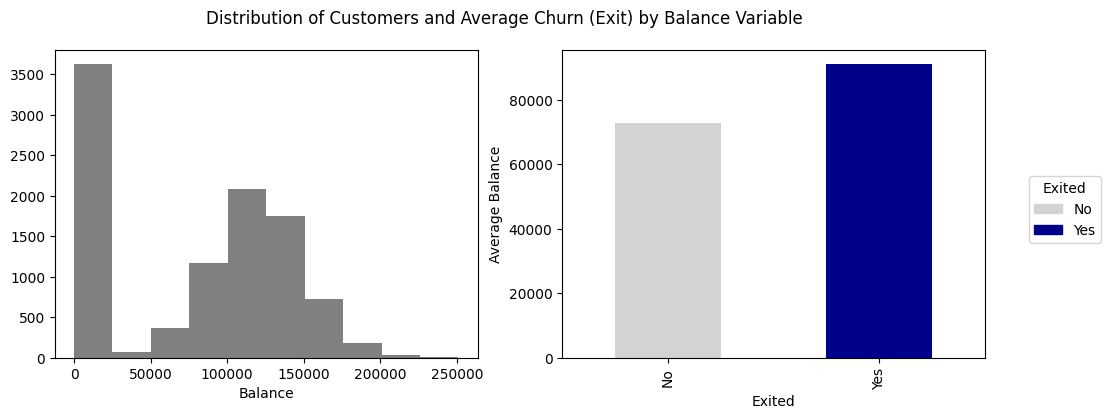

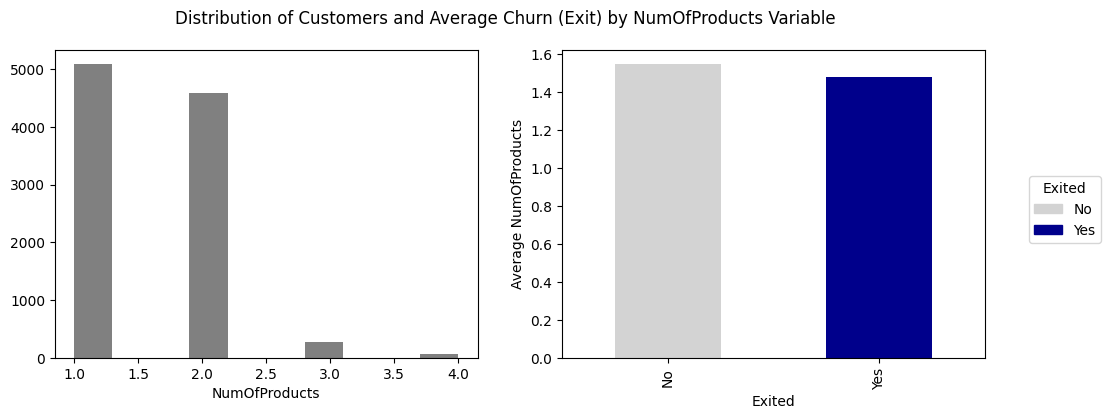

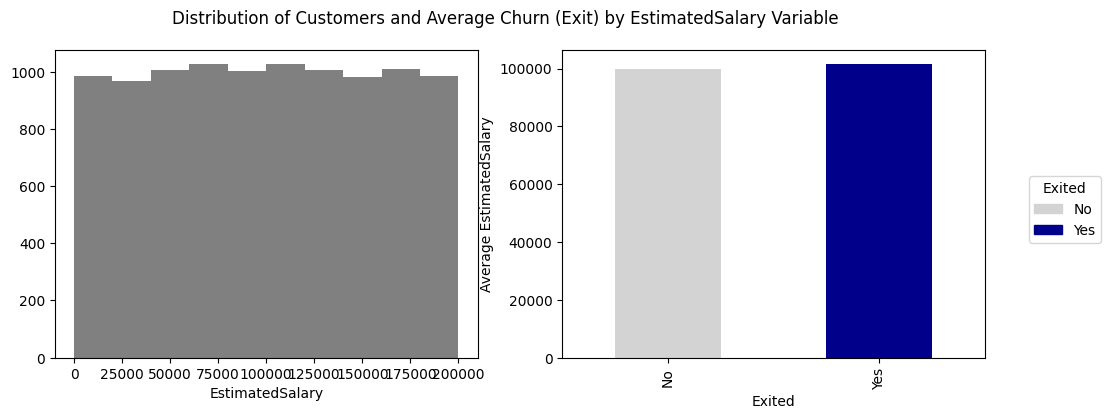

In [15]:
# for each numerical variable
for variable in numerical_cols:
    # set the figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'Distribution of Customers and Average Churn (Exit) by {variable} Variable')

    # first plot - univariate frequency; include custom x-label
    churn_df_clean[variable].hist(grid=False, bins=10, color='grey', ax=axes[0])
    axes[0].set_xlabel(variable)

    # calculate average churn
    stats_values = churn_df_clean.groupby(target_column, as_index=False, observed=False)[variable].mean()
    # second plot
    stats_values.plot(x=target_column, y=variable, kind='bar', ax=axes[1], legend=False,
                     color=[target_colors[col] for col in stats_values[target_column]])
    # Labels and title
    axes[1].set_ylabel(f"Average {variable}")
    
    # Add a single legend outside the plots (to the right) for the target legend
    fig.legend(legend_handles, legend_labels, title="Exited", loc='center right')

    # remove ylabel for geography and gender
    if variable in ['Geography', 'Gender']:
        axes[0].set_ylabel(None)
        axes[1].set_ylabel(None)

#### Insights
1. The credit scores are normally distributed and truncated at 850 (max credit score value). The average credit scores of customers who stay and those who exit are similar.
2. The age distribution is skewed to the right. Older customers are more likely to exit, while younger customers are more likely to stay.
3. Tenures are uniformly distributed until 10 years tenure. The average tenure between staying and exiting customers are similar.
4. The balance looks to be a distribution with two patterns; one is a normal distribution and to its left, is a frequency bar with people earning $25k or less. Interestingly, the account balance is higher for customers who exit than those who stay.
5. Many of the bank customers use either 1 or 2 products. Very few of them use more than 2. Both the customers who stay and the customers who exit are likely to use up to 2 products.
6. The estimated salary is uniformly distributed and there is no difference in the average estimated salaries of customers who stay and those who leave.

### Multicolinearity
The presence of multicollinearity in a regression model can lead to unstable estimates of the regression coefficients. We use the Pearson's correlation coefficient to check for the presence of features that are highly correlatable, that is, $|R| \geq 0.7$ where $|R|$ is the absolute value of the correlation coefficient. If we find any such features, we will remove them from the model.

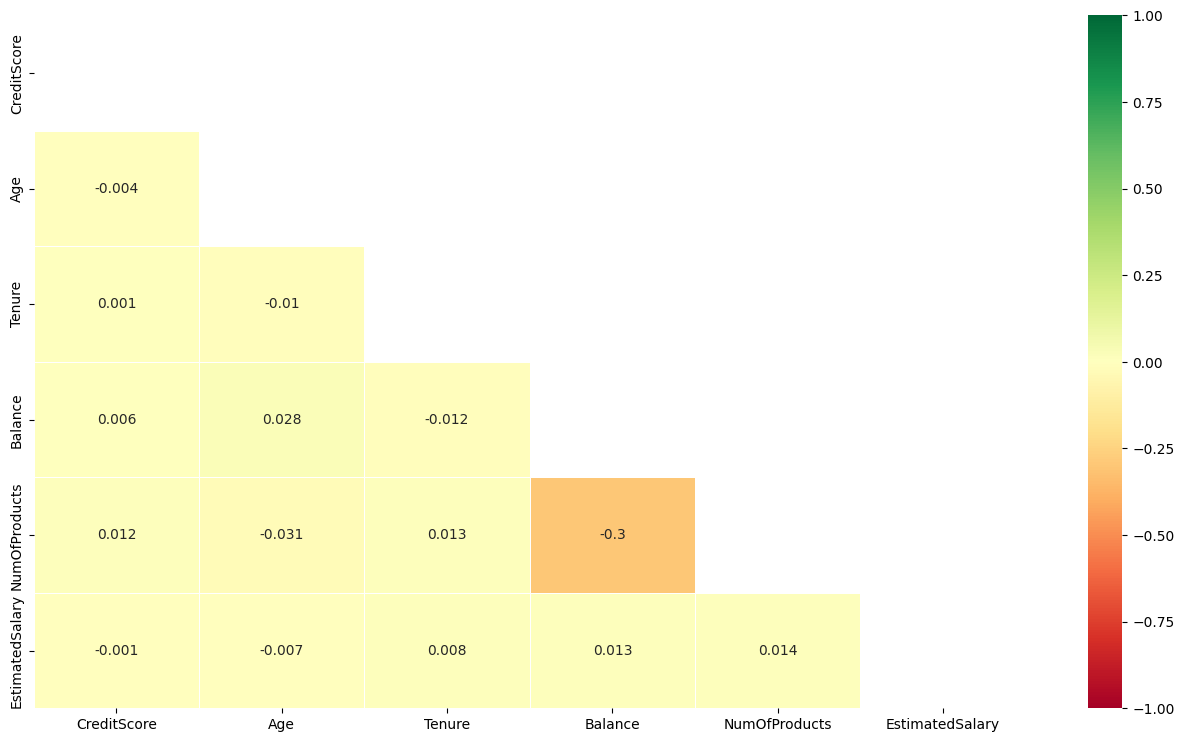

In [16]:
# create correlation matrix
corr_df = churn_df_clean[numerical_cols].corr().round(3)
# plot heatmap
f, ax = plt.subplots(figsize=(16, 9))
mask = np.zeros_like(corr_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df, mask=mask, cmap='RdYlGn', annot=True, vmax=1, vmin=-1, linewidths=.5);

#### Insights
There is little to no correlation between the numerical features.

### Multivariate EDA
We used multivariate EDA to explore the relationships between the numeric variables and how they relate to the churn (exit).

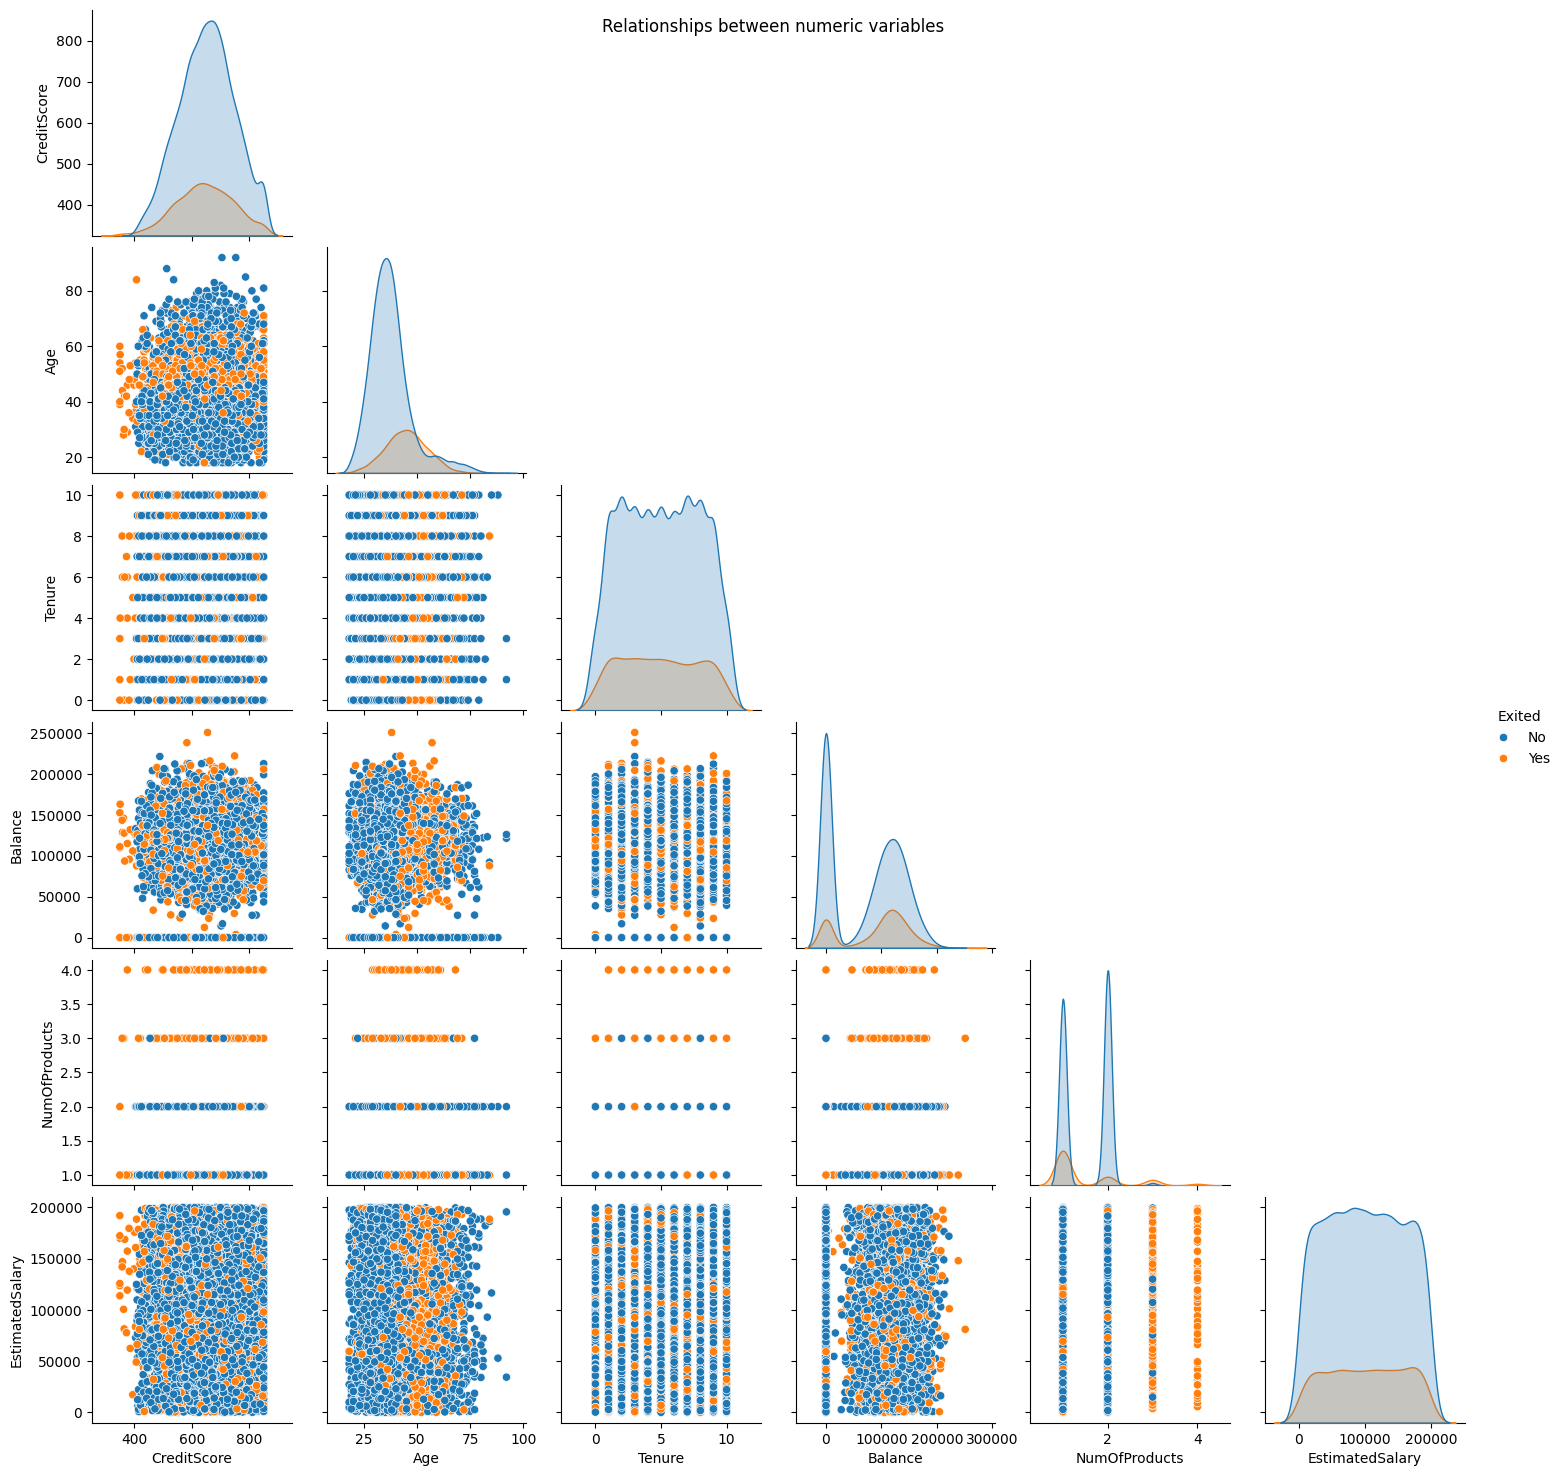

In [17]:
# visualize relationships between numeric variables
g = sns.pairplot(churn_df_clean, hue='Exited')
for i, j in zip(*np.triu_indices_from(g.axes, k=1)):  # Get upper triangle indices
    g.axes[i, j].set_visible(False)  # Hide upper triangle plots
plt.suptitle('Relationships between numeric variables')
plt.show()

## Feature Engineering
The feature engineering steps are detailed below:

1. We converted the categorical variables to numeric vectors. 
2. We randomly shuffled the data to ensure that the model is not biased towards the order of the data. 
3. We seperated features from the target variable.
4. Finally, we split the data into training and test sets to evaluate the model's performance.

The target variable `Exited` is imbalanced.  There are different techniques for training with imbalanced data such as undersampling the majority class, oversampling the minority class, penalizing the model for misclassifications etc. Oversampling and undersampling methods create similar samples of both classes, by default, although one can also specify the proportion of each class to sample. Oversampling the minority class will duplicate data which can lead to overfitting. Also, undersampling the majority class can lead to information loss in the patterns of the majority class.

While both methods can improve model training results, it is not representative of the real world data and may not generalize well to unseen data in future. The goal of this model is to generalize well to unseen data which will be imbalanced. So, we used stratified sampling on the target variable to ensure that we sample a representative proportion of both customers who stayed and those who exited, avoiding either duplication of data (increasing bias) or information loss (reducing variance).

In [18]:
# feature engineering
# set random seed
seed = 42
# treat categorical variables
feature_df = pd.get_dummies(churn_df_clean, drop_first=True, dtype=int)
# randomly shuffle the data
feature_df = feature_df.sample(frac=1, random_state=seed)
# create features X and target y
X = feature_df.drop(columns=['Exited_Yes'])
y = feature_df['Exited_Yes']
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
# initialize a standard scaler
scaler = StandardScaler()
# fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# transform the test data
X_test_scaled = scaler.transform(X_test)
# convert both scaled data to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=scaler.get_feature_names_out(), index=y_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=scaler.get_feature_names_out(), index=y_test.index)

## Model Training: Logistic Regression (LR)
We will be building a logistic regression model. This model generates probabilities of the target variable being 1 (Exited) or 0 (Not Exited). The equation can be generated and easily interpreted. The interpretability of the regression coefficients ($\beta$ values) changes depending on whether you scale your predictor variables. When using the raw data, it is easy to interpret the regression equation in terms of the original units of the predictor variables. However, if the variables are on different scales such as account balance in '000s of dollars and age in years, predictors with larger scales will dominate the model. To avoid this issue, we will scale the predictor variables. We use the Standard Scaling method to scale the predictor variables as $Z = \frac{X - \hat{X}}{S}$ where $Z$ is the scaled variable, $X$ is the original variable, $\hat{X}$ is the mean of the original variable, and $S$ is the standard deviation of the original variable. In doing this for all predictors, we are able to converge their means and standard deviations to 0 and 1 respectively. We can then compare predictors without the effect of their different measurement scales.

The logistic regression equation can still be interpreted with the scaled data but this time it will be interpreted as a function of the standard deviation. For example, with age, assume that the mean age is 35 years and the standard deviation is 10 years. If a customer is 35 years old, the $Z$ value is $\frac{35-35}{10}=0$. If we were to build a logistic regression model on exit with the scaled version of age, then a one unit increase is actually a one unit increase in Z. So if we increase his original Z value of 0 to 1, then $1 = \frac{X - 35}{10}; 10 = X - 35; X = 45$. So, a one unit increase in Z increased his age by 10 years, which is the standard deviation.

Therefore, the logistic regression model with standard scaled predictors can be interpreted as a function of the standard deviation of the predictor variables. Increasing the predictor by 1 standard deviation will increase the log odds of the target variable by $\beta$ value and increase the odds of the target variable by $e^{\beta}-1$ value where $\beta$ is the coefficient of the predictor variable.

### Feature Selection
The EDA has given us an idea of the features that could be important to our model. However, only visualization may not be an all-encompassing approach because visualization only goes as far as 3D/4D. As a means to further verify, we will use statistical methods also (individual t-tests and their corresponding p-values) to select the significant predictors. We will use the p-value threshold of 0.05 (which means a 95% confidence interval). We will also use the Akaike Information Criterion (AIC) to evaluate the performance of the first full model compared to the model with the selected features. The model with the lowest AIC will be considered the first valid model.

In [19]:
# train logit model with all predictors
logit_full_model = sm.Logit(y_train, sm.add_constant(X_train_scaled))
logit_full_model_results = logit_full_model.fit()

# Summary Table
print(logit_full_model_results.summary())

Optimization terminated successfully.
         Current function value: 0.426965
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Exited_Yes   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7988
Method:                           MLE   Df Model:                           11
Date:                Sun, 23 Feb 2025   Pseudo R-squ.:                  0.1560
Time:                        22:16:21   Log-Likelihood:                -3415.7
converged:                       True   LL-Null:                       -4047.2
Covariance Type:            nonrobust   LLR p-value:                4.430e-264
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6544      0.035    -47.826      0.000      -1.722      -1.587
Credi

In [20]:
# aic score for model with all predictors
print(f'The AIC score for the full model is: {logit_full_model_results.aic}')

The AIC score for the full model is: 6855.446634363847


Using a p-value of 0.05, the `EstimatedSalary` (p-value = 0.119>0.05) and `HasCrCard_Yes` (p-value = 0.956>0.05) predictors are insignificant to be in the model. **Note that although the Geography_Spain predictor has a p-value = 0.535>0.05, it is a dummy variable created from the `Geography` predictor and since one of the dummy variables from this predictor, namely Germany, is significant, we will leave all dummy variables from this predictor in the model.**

In [21]:
# train logit model with only significant predictors
X_train_scaled_significant = X_train_scaled.drop(columns=['EstimatedSalary', 'HasCrCard_Yes'])

# retrain logit model with only significant predictors
logit_sig_model = sm.Logit(y_train, sm.add_constant(X_train_scaled_significant))
logit_sig_model_results = logit_sig_model.fit()

# Summary Table
print(logit_sig_model_results.summary())

Optimization terminated successfully.
         Current function value: 0.427117
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Exited_Yes   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7990
Method:                           MLE   Df Model:                            9
Date:                Sun, 23 Feb 2025   Pseudo R-squ.:                  0.1557
Time:                        22:16:22   Log-Likelihood:                -3416.9
converged:                       True   LL-Null:                       -4047.2
Covariance Type:            nonrobust   LLR p-value:                1.054e-265
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6537      0.035    -47.826      0.000      -1.722      -1.586
Credi

In [22]:
# aic score for model with significant predictors
print(f'The AIC score for the model with only statistically significant predictors is: {logit_sig_model_results.aic}')

The AIC score for the model with only statistically significant predictors is: 6853.874865992187


The AIC score for the statistically significant model is ~6853 which is only 2 lesser than that of the full model. The EDA also shows that the estimated salary and having credit cards do not visibly affect churn (exit). Therefore, we will use the model with only significant predictors as the starting model. Next, we check if any two-way interaction terms are significant. Interaction terms indicate whether one predictor depends on another predictor.

### Model Selection
We will use the AIC again to compare the performance of the first valid model with a model with significant two-way interaction terms and choose the model with the lowest residual deviance and AIC as the final model.

In [23]:
# create a dataframe of target and significant features
df_sig = pd.concat([X_train_scaled_significant, y_train], axis=1)

# List of predictor variables
predictors = df_sig.columns.drop("Exited_Yes")

# Generate all possible two-way interaction terms
interaction_terms = ["{}:{}".format(a, b) for a, b in combinations(predictors, 2)]

# Generate the formula dynamically
formula = "Exited_Yes ~ " + " + ".join(predictors) + " + " + " + ".join(interaction_terms)

# create interaction terms
y_train, X_train_scaled_interac = patsy.dmatrices(formula, df_sig, return_type="dataframe")
# convert y_train to a series
y_train = y_train.Exited_Yes

In [24]:
# train another logit model with two-way interaction terms
logit_interac_model = sm.Logit(y_train, sm.add_constant(X_train_scaled_interac))
logit_interac_model_resulta = logit_interac_model.fit()

# Summary Table
print(logit_interac_model_resulta.summary())

         Current function value: 0.402249
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             Exited_Yes   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7955
Method:                           MLE   Df Model:                           44
Date:                Sun, 23 Feb 2025   Pseudo R-squ.:                  0.2049
Time:                        22:16:23   Log-Likelihood:                -3218.0
converged:                      False   LL-Null:                       -4047.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -1.4758        nan        nan        nan         nan

c:\Users\user\anaconda3\envs\ucalgary\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


It is interesting to note here that there wa a convergence warning and the `Geography` predictors have null p-values. This is because there is an interaction term `Geography_Germany:Geography_Spain` formed from the interaction between dummy variables of the same predictor.

To build our final interaction model, we only consider significant interaction terms.

In [25]:
# train logit model with significant predictors and interaction terms
sig_interac_predictors = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'Geography_Germany', 'Geography_Spain',
                          'Gender_Male', 'IsActiveMember_Yes', 'Age:IsActiveMember_Yes', 'Balance:NumOfProducts', 
                          'NumOfProducts:Geography_Germany', 'NumOfProducts:Gender_Male']
X_train_scaled_sig_interac = X_train_scaled_interac[sig_interac_predictors]

# retrain logit model with only significant predictors
logit_sig_interac_model = sm.Logit(y_train, sm.add_constant(X_train_scaled_sig_interac))
logit_sig_interac_model_results = logit_sig_interac_model.fit()

# Summary Table
print(logit_sig_interac_model_results.summary())

Optimization terminated successfully.
         Current function value: 0.403801
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Exited_Yes   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7986
Method:                           MLE   Df Model:                           13
Date:                Sun, 23 Feb 2025   Pseudo R-squ.:                  0.2018
Time:                        22:16:23   Log-Likelihood:                -3230.4
converged:                       True   LL-Null:                       -4047.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.5218      0.035    -43.714  

In [26]:
# train logit model with final significant predictors and interaction terms
X_train_scaled_final_interac = X_train_scaled_sig_interac.drop(columns=['CreditScore'])

# retrain logit model with only significant predictors
logit_final_interac_model = sm.Logit(y_train, sm.add_constant(X_train_scaled_final_interac))
logit_final_interac_model_results = logit_final_interac_model.fit()

# Summary Table
print(logit_final_interac_model_results.summary())

Optimization terminated successfully.
         Current function value: 0.404016
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Exited_Yes   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7987
Method:                           MLE   Df Model:                           12
Date:                Sun, 23 Feb 2025   Pseudo R-squ.:                  0.2014
Time:                        22:16:23   Log-Likelihood:                -3232.1
converged:                       True   LL-Null:                       -4047.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.5207      0.035    -43.710  

In [27]:
# final AIC score
logit_final_interac_model_results.aic

6490.262614928653

The AIC score for the interaction model has dropped to ~6490 from ~6853 making it a better model than the simple additive model.

In [28]:
# create a dataframe of the same target and feature variables from the interaction model with the test set
X_test_scaled_interac = X_test_scaled.loc[:, X_test_scaled.columns.isin(X_train_scaled_interac.columns)]
df_interac_test = pd.concat([X_test_scaled_interac, y_test], axis=1)

# List of predictor variables
predictors = df_interac_test.columns.drop("Exited_Yes")

# Generate all possible two-way interaction terms
interaction_terms = ["{}:{}".format(a, b) for a, b in combinations(predictors, 2)]

# Generate the formula dynamically
formula = "Exited_Yes ~ " + " + ".join(predictors) + " + " + " + ".join(interaction_terms)

# create interaction terms
y_test, X_test_scaled_interac = patsy.dmatrices(formula, df_interac_test, return_type="dataframe")

# select only significant interaction terms
X_test_scaled_final_interac = X_test_scaled_interac.loc[:, X_test_scaled_interac.columns.isin(X_train_scaled_final_interac.columns)]
# convert y_test to a series
y_test = y_test['Exited_Yes']

### Model Hyperparameter Tuning
After identifying all features and interaction terms, we will tune the `penalty` and `class_weights` hyperparameters of the model. 

The penalty hyperparameter chooses the regularization technique. This can be L1 (setting some features to 0 for a simpler model), L2 (keeping all features but ensuring that none is more "powerful" than the other), or elasticnet (a ratio of both L1 and L2). If using elastic net, the ratio of L1 to L2 must be set. For the elastic net solver, we set it to 0.5 for an equal ratio of L1 and L2 methods. The logistic regression algorithm solver also differs for each regularization method. While most solvers support L2, only the `liblinear` solver also supports L1 and the the `saga` solver also supports elastic net. We will use the `liblinear` solver for L1, `saga` for elastic net, and the default `lbfgs` for L2.

The class weights hyperparameter controls the importance of each class. We will alternate between assigning no weights which assumes equal weight for both classes and assigning balanced weights to give the minority class more importance. 

The weights are inversely proportional to the frequencies and calculated with this formula $\frac{TotalNumberOfSamples}{NumberOfClasses \times NumberOfSamplesInClass}$.

In [29]:
# hyperparameters
# different penalty values
penalties = ['l1', 'l2', 'elasticnet']
# create a mapping of l1_ratios for the different penalties
l1_ratios = {'l1': None, 'l2': None, 'elasticnet':0.5}
# create a mapping of algorithm solvers for the different penalties
solvers = {'l1': 'liblinear', 'l2': 'lbfgs', 'elasticnet':'saga'}
# different weight values
class_weights = [None, 'balanced']

In [30]:
# create a dictionary of model results
logistic_regression_models = {}

# loop through each posible combination of penalty and class weights
for penalty in penalties:
    for weight in class_weights:
        # Train Logistic Regression
        model = LogisticRegression(fit_intercept=True, penalty=penalty, solver=solvers[penalty],
                                   l1_ratio=l1_ratios[penalty], class_weight=weight)
        model.fit(X_train_scaled_final_interac, y_train)
        # store model results
        logistic_regression_models[(penalty, weight)] = model

### Model Scoring: LR
In churn analysis, the business goal is to proactively identify customers who are likely to churn. This means that the evaluation metric that supports the business goal is the recall score which calculates the proportion of actual positive instances that are correctly identified. 

In addition to correctly predicting churned(exited) customers, we also want to have a good return on investment (ROI). The expected ROI is defined by the expected revenue minus the expected cost of retention campaigns. To estimate this, we need a value of the expected cost and revenue. We asked ChatGPT to find sources and give an estimate of these values. The expected revenue ranges from €500 to €1000 while the expected cost of retention campaigns ranges from €50 to €200. *Disclaimer: These expected values serve as a guide to understand how to tackle the impact of a trained classification model in real-world context. They have been geenrated by an AI tool and should not be taken as actual values without additional research.*

For customers who stayed and were predicted to stayed, we consider the revenue generated. For customers who stayed but were predicted to stay, they will be erroneously targeted for customer retention programs so we consider the revenue generated less the cost of the retention campaigns.

For customers who exit and were predicted to exit, we consider the cost of the retention campaign and assume no revenue was generated from them. For customers who exit and were predicted to stay, they will not be targeted for retention campaigns. There will be neither campaign cost nor revenue from them.

We will use both the recall score and the cost-benefit analysis to select the final logistic regression model. 

In [31]:
# create a function that generates the classification report,
# visualizes the confusion matrix, and calculates the expected ROI for a given model
def model_evaluation_function(model, X_test, y_test, confusion_matrix_title='Model',
                              min_cost=50, max_cost=200, min_rev=500, max_rev=1000):
    '''
    Evaluate model (model metrics and ROI)

    Args:
    model: The sklearn classification model
    X_test: Predictors of the test set
    y_test: Actual target values of the test set
    confusion_matrix_title: Title of the confusion matrix
    min_cost: Minimum expected cost of customer retention program per customer
    max_cost: Maximum expected cost of customer retention program per customer
    min_rev: Minimum expected revenue per customer
    max_rev: Maximum expected revenue per customer

    Returns:
    None
    '''

    # make predictions on the test set
    y_pred = model.predict(X_test)
    # print classification report
    print(f'Classification report: \n{classification_report(y_test, y_pred)}\n')

    # calculate and print evaluation metrics
    conf_mat = confusion_matrix(y_test, y_pred)
    tn = conf_mat[0][0]
    fp =  conf_mat[0][1]
    fn = conf_mat[1][0]
    tp = conf_mat[1][1]

    pcc = (tn + tp) / (tn + fp + fn + tp)
    false_alarm_rate = fp / (tn + fp)
    false_dismissal_rate = fn / (fn + tp)
    precision = tp / (tp + fp)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f"Evaluation metrics:\nThe PCC is {pcc:.4f}\nThe false alarm rate is {false_alarm_rate:.4f}\nThe false dismissal rate is {false_dismissal_rate:.4f}\nThe precision is {precision:.4f}\nThe sensitivity is {sensitivity:.4f} and\nThe specificity is {specificity:.4f}")

    # show the confusion matrix in a heat map
    labels = ['Stayed', 'Exited']
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='Blues_r', cbar=False, 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{confusion_matrix_title} Confusion Matrix')
    plt.show()

    # show the min and max cost-benefit matrices in heat maps
    min_cost_bnft_matrix = np.array([[min_rev, min_rev-min_cost], [0, min_rev-min_cost]])
    max_cost_bnft_matrix = np.array([[max_rev, max_rev-max_cost], [0, max_rev-max_cost]])
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle('Minimum and Maximum Cost-Benefit Matrices')
    sns.heatmap(min_cost_bnft_matrix, annot=True, fmt="d", cmap='inferno', cbar=False, 
                xticklabels=labels, yticklabels=labels, ax=axes[0])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    axes[0].set_title('Minimum')

    sns.heatmap(max_cost_bnft_matrix, annot=True, fmt="d", cmap='inferno', cbar=False, 
                xticklabels=labels, yticklabels=labels, ax=axes[1])
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')
    axes[1].set_title('Maximum')
    plt.show()

    # calculate expected ROI
    min_cost_bnft_matrix = np.array([[min_rev, min_rev-min_cost], [0, min_rev-min_cost]])
    min_exp_roi = (conf_mat * min_cost_bnft_matrix).sum() / len(y_test)
    print(f"The minimum expected ROI is ${min_exp_roi:.2f}")
    max_exp_roi = (conf_mat * max_cost_bnft_matrix).sum() / len(y_test)
    print(f"The maximum expected ROI is ${max_exp_roi:.2f}")

#### LR Model 1
This model uses L1 regularization without class weights.

LogisticRegression(penalty='l1', solver='liblinear')
Classification report: 
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90      1595
         1.0       0.72      0.30      0.43       405

    accuracy                           0.83      2000
   macro avg       0.78      0.64      0.66      2000
weighted avg       0.82      0.83      0.81      2000


Evaluation metrics:
The PCC is 0.8350
The false alarm rate is 0.0295
The false dismissal rate is 0.6988
The precision is 0.7219
The sensitivity is 0.3012 and
The specificity is 0.9705


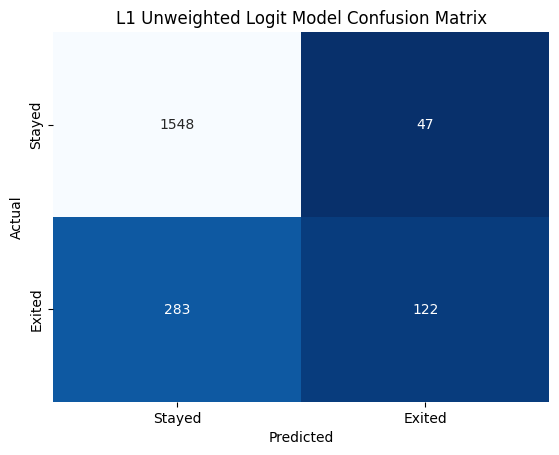

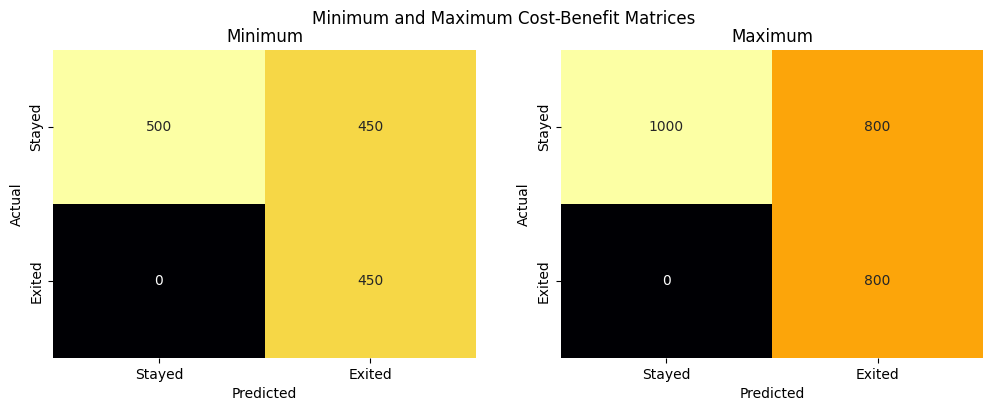

The minimum expected ROI is $425.02
The maximum expected ROI is $841.60


In [32]:
# extract model
lr_model1 = logistic_regression_models[('l1', None)]
print(lr_model1)
# evaluate model
model_evaluation_function(model=lr_model1, X_test=X_test_scaled_final_interac, y_test=y_test,
                          confusion_matrix_title='L1 Unweighted Logit Model')

#### LR Model 2
This model uses L1 regularization with balanced class weights.

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')
Classification report: 
              precision    recall  f1-score   support

         0.0       0.90      0.76      0.82      1595
         1.0       0.41      0.66      0.51       405

    accuracy                           0.74      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.80      0.74      0.76      2000


Evaluation metrics:
The PCC is 0.7380
The false alarm rate is 0.2433
The false dismissal rate is 0.3358
The precision is 0.4094
The sensitivity is 0.6642 and
The specificity is 0.7567


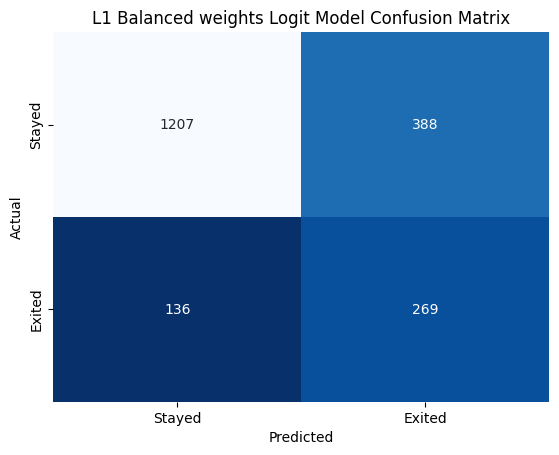

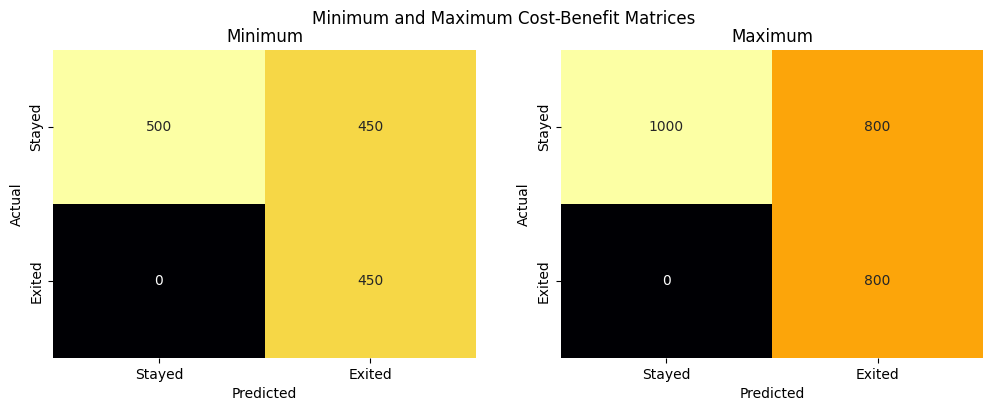

The minimum expected ROI is $449.57
The maximum expected ROI is $866.30


In [33]:
# extract model
lr_model2 = logistic_regression_models[('l1', 'balanced')]
print(lr_model2)
# evaluate model
model_evaluation_function(model=lr_model2, X_test=X_test_scaled_final_interac, y_test=y_test,
                          confusion_matrix_title='L1 Balanced weights Logit Model')

#### LR Model 3
This model uses L2 regularization without class weights.

LogisticRegression()
Classification report: 
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90      1595
         1.0       0.72      0.30      0.43       405

    accuracy                           0.84      2000
   macro avg       0.78      0.64      0.67      2000
weighted avg       0.82      0.84      0.81      2000


Evaluation metrics:
The PCC is 0.8355
The false alarm rate is 0.0295
The false dismissal rate is 0.6963
The precision is 0.7235
The sensitivity is 0.3037 and
The specificity is 0.9705


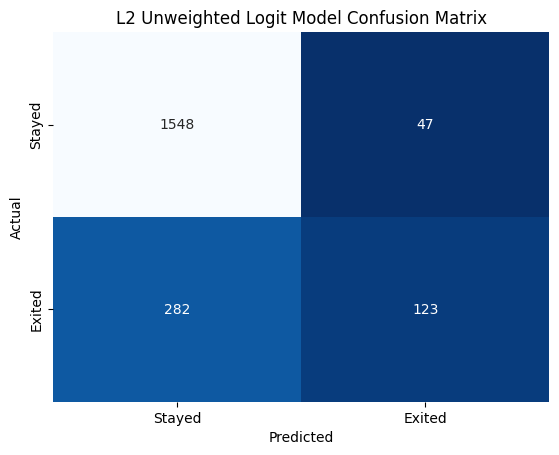

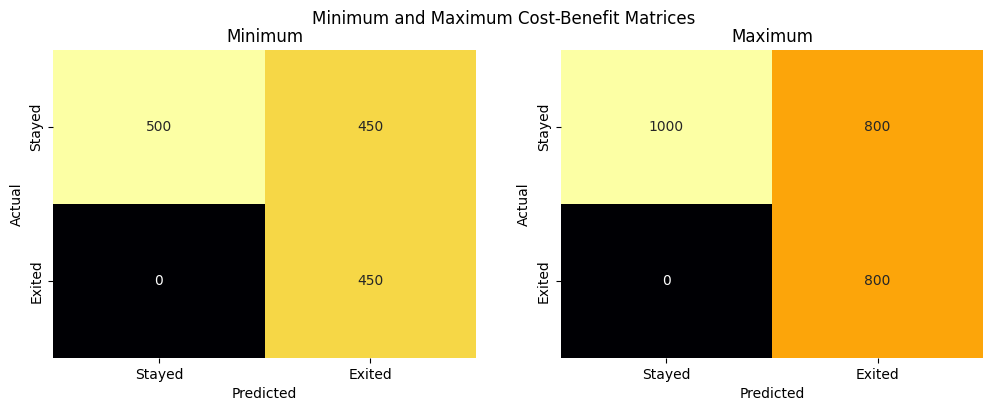

The minimum expected ROI is $425.25
The maximum expected ROI is $842.00


In [34]:
# extract model
lr_model3 = logistic_regression_models[('l2', None)]
print(lr_model3)
# evaluate model
model_evaluation_function(model=lr_model3, X_test=X_test_scaled_final_interac, y_test=y_test,
                          confusion_matrix_title='L2 Unweighted Logit Model')

#### LR Model 4
This model uses L2 regularization with balanced class weights.

LogisticRegression(class_weight='balanced')
Classification report: 
              precision    recall  f1-score   support

         0.0       0.90      0.76      0.82      1595
         1.0       0.41      0.66      0.51       405

    accuracy                           0.74      2000
   macro avg       0.66      0.71      0.67      2000
weighted avg       0.80      0.74      0.76      2000


Evaluation metrics:
The PCC is 0.7395
The false alarm rate is 0.2414
The false dismissal rate is 0.3358
The precision is 0.4113
The sensitivity is 0.6642 and
The specificity is 0.7586


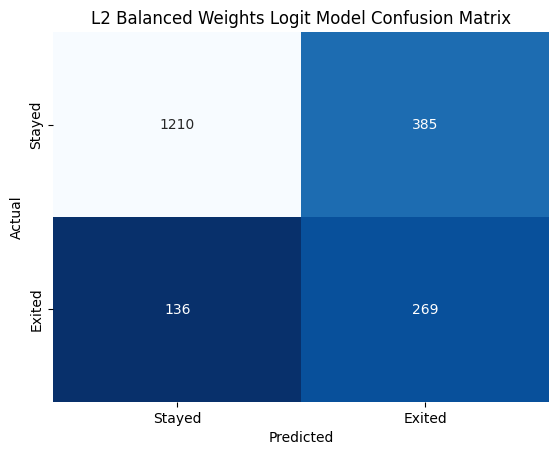

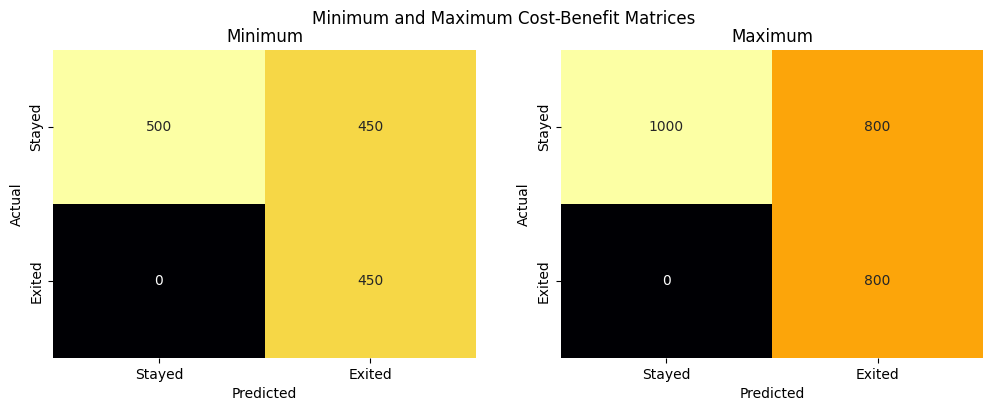

The minimum expected ROI is $449.65
The maximum expected ROI is $866.60


In [35]:
# extract model
lr_model4 = logistic_regression_models[('l2', 'balanced')]
print(lr_model4)
# evaluate model
model_evaluation_function(model=lr_model4, X_test=X_test_scaled_final_interac, y_test=y_test,
                          confusion_matrix_title='L2 Balanced Weights Logit Model')

#### LR Model 5
This model uses both L1 and L2 regularization without class weights.

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')
Classification report: 
              precision    recall  f1-score   support

         0.0       0.85      0.97      0.90      1595
         1.0       0.72      0.30      0.43       405

    accuracy                           0.83      2000
   macro avg       0.78      0.64      0.66      2000
weighted avg       0.82      0.83      0.81      2000


Evaluation metrics:
The PCC is 0.8350
The false alarm rate is 0.0295
The false dismissal rate is 0.6988
The precision is 0.7219
The sensitivity is 0.3012 and
The specificity is 0.9705


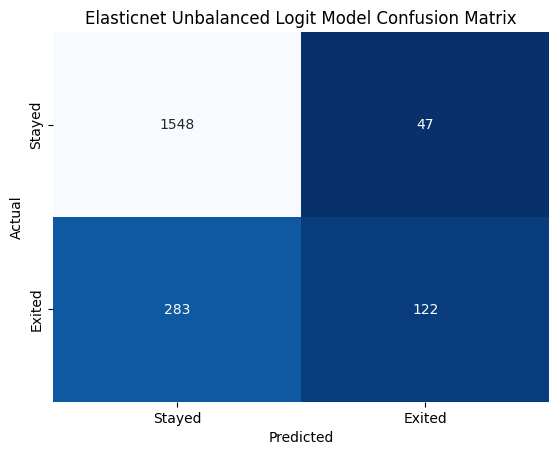

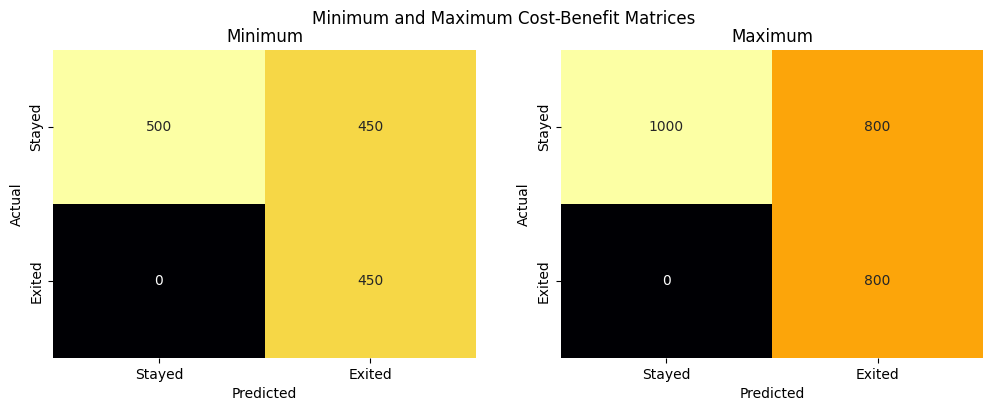

The minimum expected ROI is $425.02
The maximum expected ROI is $841.60


In [36]:
# extract model
lr_model5 = logistic_regression_models[('elasticnet', None)]
print(lr_model5)
# evaluate model
model_evaluation_function(model=lr_model5, X_test=X_test_scaled_final_interac, y_test=y_test,
                          confusion_matrix_title='Elasticnet Unbalanced Logit Model')

#### LR Model 6
This model uses elasticnet (both L1 and L2) regularization with balanced class weights.

LogisticRegression(class_weight='balanced', l1_ratio=0.5, penalty='elasticnet',
                   solver='saga')
Classification report: 
              precision    recall  f1-score   support

         0.0       0.90      0.76      0.82      1595
         1.0       0.41      0.66      0.51       405

    accuracy                           0.74      2000
   macro avg       0.65      0.71      0.66      2000
weighted avg       0.80      0.74      0.76      2000


Evaluation metrics:
The PCC is 0.7385
The false alarm rate is 0.2426
The false dismissal rate is 0.3358
The precision is 0.4101
The sensitivity is 0.6642 and
The specificity is 0.7574


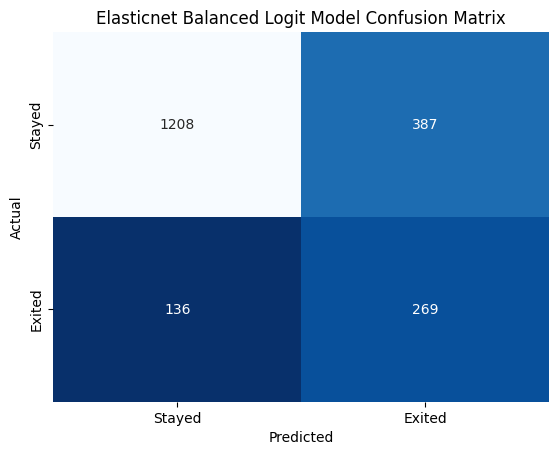

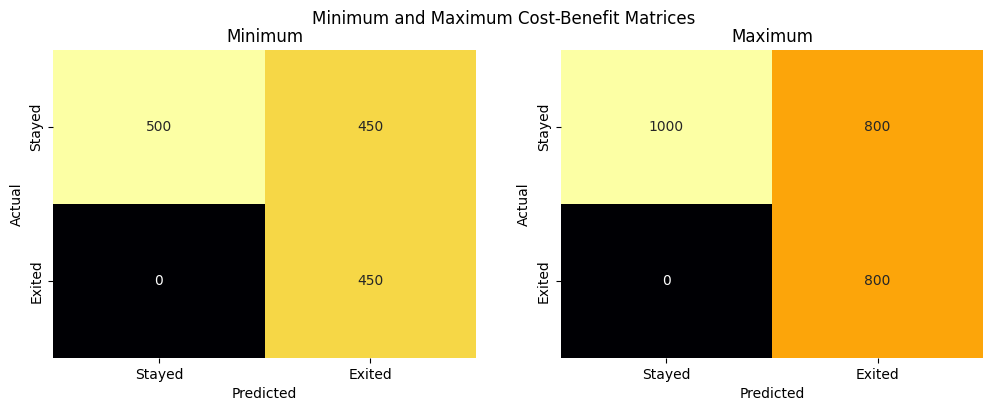

The minimum expected ROI is $449.60
The maximum expected ROI is $866.40


In [37]:
# extract model
lr_model6 = logistic_regression_models[('elasticnet', 'balanced')]
print(lr_model6)
# evaluate model
model_evaluation_function(model=lr_model6, X_test=X_test_scaled_final_interac, y_test=y_test,
                          confusion_matrix_title='Elasticnet Balanced Logit Model')

### Final LR Model Selection

The benefits outweigh the costs more for the models with balanced class weights. Comparing the evaluation metrics for all models with balanced class weights, the model that performs best is the one with L2 regularization. Here are its evaluation metrics:

1. **The PCC is 0.7395**
2. The false alarm rate is 0.2414
3. The false dismissal rate is 0.3358
4. The precision is 0.4113
5. **The sensitivity is 0.6642**
6. The specificity is 0.7586
7. The minimum expected ROI is $449.65
8. The maximum expected ROI is $866.60

Finally, we will interpret this model.

In [38]:
best_lr_model = lr_model4

### LR Model Interpretation
The interpretation of this logit model is in terms of a one unit increase in standard deviation of the original variable. We will use the standard deviation values to make predictor increment interpretations, the model coefficients to make log-odds interpretations, and the exponential of the model coefficients to make odds and odds-ratio interpretations.

In [39]:
# extract model coefficients - include + sign for positive coef
model_coefficients = best_lr_model.coef_[0]
logit_coefficients = [str(round(i, 4)) if i < 0 else "+"+str(round(i, 4)) for i in best_lr_model.coef_[0]]
# extract model intercept
logit_intercept = round(best_lr_model.intercept_[0], 4)
# create model formula
formula = f"{logit_intercept}" + ' ' + ' '.join([f"{i} Z_{j}" for i,j in zip(logit_coefficients, best_lr_model.feature_names_in_)])

In [40]:
formula

'-0.1901 +0.9059 Z_Age -0.074 Z_Tenure +0.1889 Z_Balance -0.0712 Z_NumOfProducts +0.299 Z_Geography_Germany +0.0157 Z_Geography_Spain -0.2698 Z_Gender_Male -0.4042 Z_IsActiveMember_Yes -0.4283 Z_Age:IsActiveMember_Yes +0.342 Z_Balance:NumOfProducts -0.1526 Z_NumOfProducts:Geography_Germany -0.0639 Z_NumOfProducts:Gender_Male'

The equation of the best logit model is

$$
\begin{aligned}
\widehat{\text{logit}} &= -0.1901 +0.9059Z_{Age} -0.074Z_{Tenure} +0.1889Z_{Balance} -0.0712Z_{NumOfProducts} \\
& +0.299Z_{Geography_{Germany}} +0.0157Z_{Geography_{Spain}} -0.2698Z_{Gender_{Male}} -0.4042Z_{IsActiveMember} \\
& -0.4283Z_{Age:IsActiveMember} +0.342Z_{Balance:NumOfProducts} -0.1526Z_{NumOfProducts:Geography_{Germany}} \\
& -0.0639Z_{NumOfProducts:Gender_{Male}}
\end{aligned}
$$ 
where $Z$ is the standardized value of each predictor.

In [41]:
# standard deviation of original predictors
print('Standard deviations:')
print(np.ceil(churn_df_clean[numerical_cols].std()))

Standard deviations:
CreditScore           97.0
Age                   11.0
Tenure                 3.0
Balance            62398.0
NumOfProducts          1.0
EstimatedSalary    57511.0
dtype: float64


### Interpretations
For each predictor interpretations, all other predictors are held constant.

1. If the customer is an active member, an 11-year increase in Age increases the log-odds of exiting by 0.4776 and increases the odds by 61.22%.

2. If the customer is not an active member, an 11-year increase in Age increases the log-odds of exiting by 0.9059 and increases the odds by 147.42%.
3. A 3-year increase in Tenure decreases the log-odds of exiting customers by 0.074 and decreases the odds by 7.13%.
4. A 62,400 euros increase in Balance increases the log-odds of exiting by $(0.1889 +0.342Z_{Balance:NumOfProducts})$ and increases the odds by $e^{(0.1889 +0.342Z_{Balance:NumOfProducts})} - 1$.
5. A one unit increase in the number of products used decreases the log-odds of exiting by $(-0.0712+0.342Z_{Balance:NumOfProducts} -0.1526Z_{NumOfProducts:Geography_{Germany}} -0.0639Z_{NumOfProducts:Gender_{Male}})$ and decreases the odds by $e^{(-0.0712+0.342Z_{Balance:NumOfProducts} -0.1526Z_{NumOfProducts:Geography_{Germany}} -0.0639Z_{NumOfProducts:Gender_{Male}})} - 1$.
6. The odds of customers in Germany exiting is $e^{(0.299 -0.1526Z_{NumOfProducts:Geography_{Germany}})} - 1$ higher than the odds for customers in France.
7. The odds of customers in Spain exiting is 1.58% higher than the odds for customers in France.
8. The odds of male customers exiting is $e^{(-0.2698 -0.0639Z_{NumOfProducts:Gender_{Male}})} - 1$ lower than the odds for feamle customers.
9. The odds of active customers exiting is $e^{(-0.4042 -0.4283Z_{Age:IsActiveMember})} - 1$ lower than the odds for non-active customers.

## KNN

k- Nearest Neighbors is one of the most basic algorithms used in supervised machine learning. It classifies new data points based on similarity index which is usually a distance metric. It uses a majority vote will classifying the new data. For example, consider that there are 3 black dots and 5 red dots. If 1 new dot is placed closer to the black dots, it will be classified as a black dot.

The model is first trained with the default parameters. Then, we tune the hyperparameters with a **Grid Search Cross-Validation Approach prioritizing the recall score** as follows:

1. the nearest neighbors are set to a range of 1 to 20
2. the distance metric is chosen between euclidean and manhattan
3. the weights are chosen between uniform weights (all points are weighed equally) or using the distance (points are weighted from the inverse of their distance so closer neighbors of a new data point will have a greater influence).

In [42]:
# Implementing K-Nearest Neighbors (KNN) Model

# Step 1: Train KNN Model with Default Parameters
knn = KNeighborsClassifier(n_neighbors=5)  # Choosing k=5 initially
knn.fit(X_train_scaled, y_train)

# Step 2: Hyperparameter Tuning using Grid Search with Cross Validation
params = {
    'n_neighbors': list(range(1, 20)), 
    'metric': ["euclidean", "manhattan"], 
    'weights': ['uniform', 'distance']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=10, scoring='recall')
knn_grid.fit(X_train_scaled, y_train)

# Step 3: Best Parameters and Re-evaluation
print("Best Parameters:", knn_grid.best_params_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


### Initial KNN Model with Default Parameters

Classification report: 
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      1595
         1.0       0.64      0.35      0.45       405

    accuracy                           0.83      2000
   macro avg       0.75      0.65      0.68      2000
weighted avg       0.81      0.83      0.81      2000


Evaluation metrics:
The PCC is 0.8290
The false alarm rate is 0.0495
The false dismissal rate is 0.6494
The precision is 0.6425
The sensitivity is 0.3506 and
The specificity is 0.9505


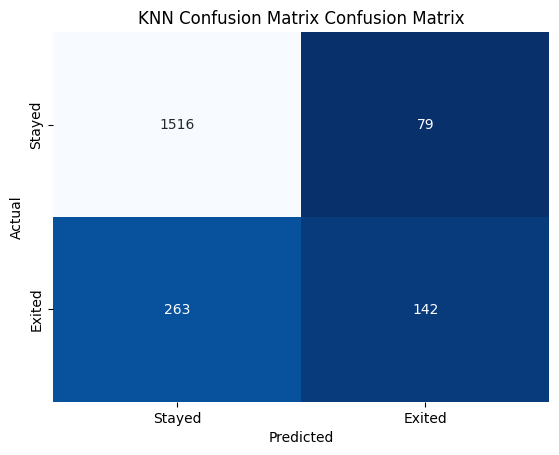

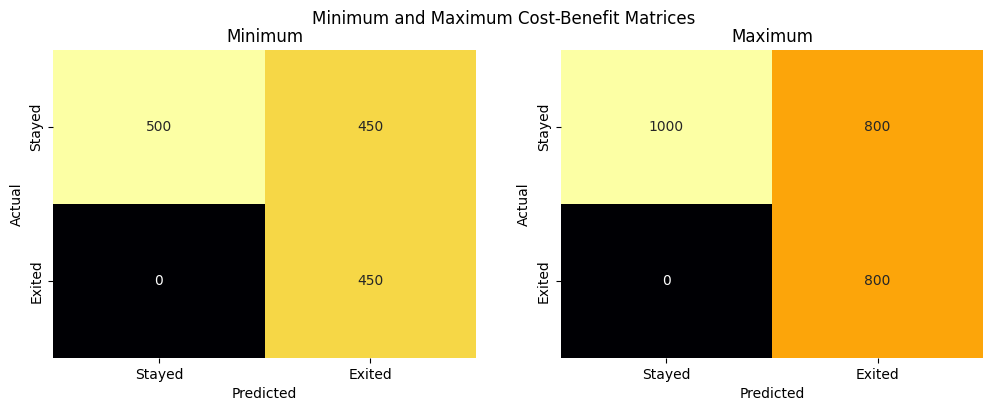

The minimum expected ROI is $428.73
The maximum expected ROI is $846.40


In [43]:
model_evaluation_function(model=knn, X_test=X_test_scaled, y_test=y_test, confusion_matrix_title='KNN Confusion Matrix')

#### Insights
Initial KNN Model Performance:
Confusion Matrix Analysis:

True Negatives (TN): 1516 (Correctly classified "Stayed" customers) \
False Positives (FP): 79 (Incorrectly classified "Stayed" as "Exited") \
False Negatives (FN): 263 (Incorrectly classified "Exited" as "Stayed") \
True Positives (TP): 142 (Correctly classified "Exited" customers) 

Classification Report Analysis:

Accuracy: 0.83 → The model correctly classified 83% of the test data. \
Precision for "Yes" (Exited): 0.64 → 64% of predicted exits were correct. \
Recall for "Yes" (Exited): 0.35 → The model detected only 35% of actual exited customers. \
F1-score for "Yes" (Exited): 0.45 → A poor balance of precision and recall. \
**Key Observation: The model has high accuracy but very poor recall for the exited class, meaning it fails to capture most of the customers who actually left.**

### Optimized KNN Model with Hyperparameter Tuning

Classification report: 
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1595
         1.0       0.51      0.46      0.48       405

    accuracy                           0.80      2000
   macro avg       0.69      0.67      0.68      2000
weighted avg       0.79      0.80      0.80      2000


Evaluation metrics:
The PCC is 0.8020
The false alarm rate is 0.1103
The false dismissal rate is 0.5432
The precision is 0.5125
The sensitivity is 0.4568 and
The specificity is 0.8897


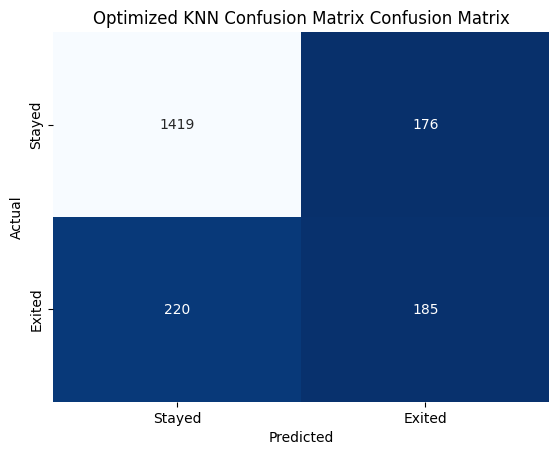

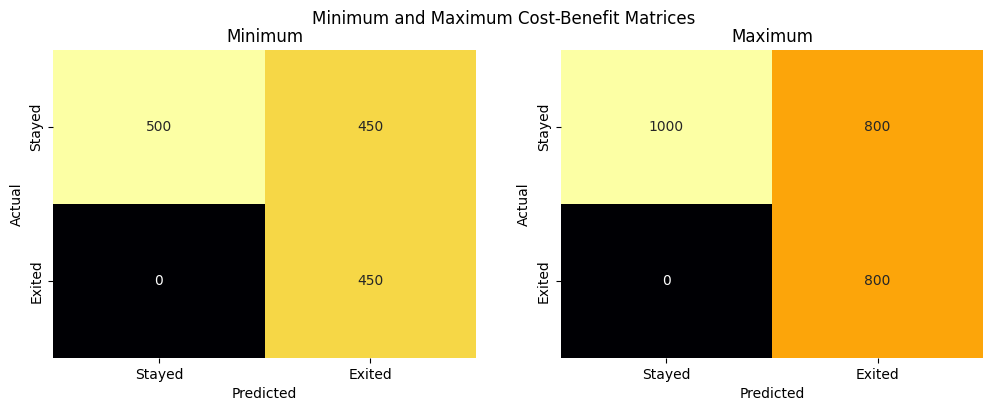

The minimum expected ROI is $435.98
The maximum expected ROI is $853.90


In [44]:
model_evaluation_function(model=knn_grid, X_test=X_test_scaled, y_test=y_test, confusion_matrix_title='Optimized KNN Confusion Matrix')

#### Insights
Optimized KNN Model Performance (After Hyperparameter Tuning): \
Best Parameters Chosen: 

n_neighbors = 1 \
metric = euclidean \
weights = uniform

The n_neighbors used is 1 which indicates presence of overfitting.

Confusion Matrix Analysis:
True Negatives (TN): 1419 (Slightly improved from 1508) \
False Positives (FP): 176 (Huge reduction from 85) \
False Negatives (FN): 220 (Increased from 382) \
True Positives (TP): 185 (Dropped from 25) \

Classification Report Analysis:

Accuracy: 0.80 → A slight decrease from 0.83. \
Precision for "Yes" (Exited): 0.51 → The model classifies only about half of the exited customers correctly. \
Recall for "Yes" (Exited): 0.46 → The model detects 46% of exited customers. \
F1-score for "Yes" (Exited): 0.48 → The balance between precision and recall is 48%. \

Key Observation:

The extreme class imbalance is affecting the KNN model, causing it to predict almost exclusively the majority class (Stayed).
While hyperparameter tuning increases recall to 46%, there is an accuracy tradeoff where accuracy decreased to 80%, but the recall is still not good enough for the model to effectively help business decisions related to customer exits. Infact, the hyperparameter tuning increased chances of overfitting by using only the first nearest neighbor (n_neighbours = 1) meaning there is a higher chance of poor geenralization on new data in future.

When is this model useful?

1. If the goal is to identify customers who will stay with high confidence, this model works well.
   Example: If a marketing team wants to target loyal customers for a rewards program, this model can help identify them accurately.
2. When is this model NOT useful?
   If the business wants to reduce customer exits, this model is ineffective because it only detects 46% of actual cases.

3. How to Improve the Model for Exit Prediction?

- Try other different KNN configurations.
- Consider alternative models like:
   - Logistic Regression
   - Decision Trees
   - Random Forest
   - Gradient Boosting

These models can handle imbalanced data better and provide feature importance insights.

Conclusion:
- The optimized KNN model is not suitable for exit detection since identifies only 46% exited customers.
- The issue likely stems from class imbalance, which should be addressed before retrying KNN.
- If exit prediction is the goal, alternative models should be considered.

## Decision Tree

In [45]:
# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=seed)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

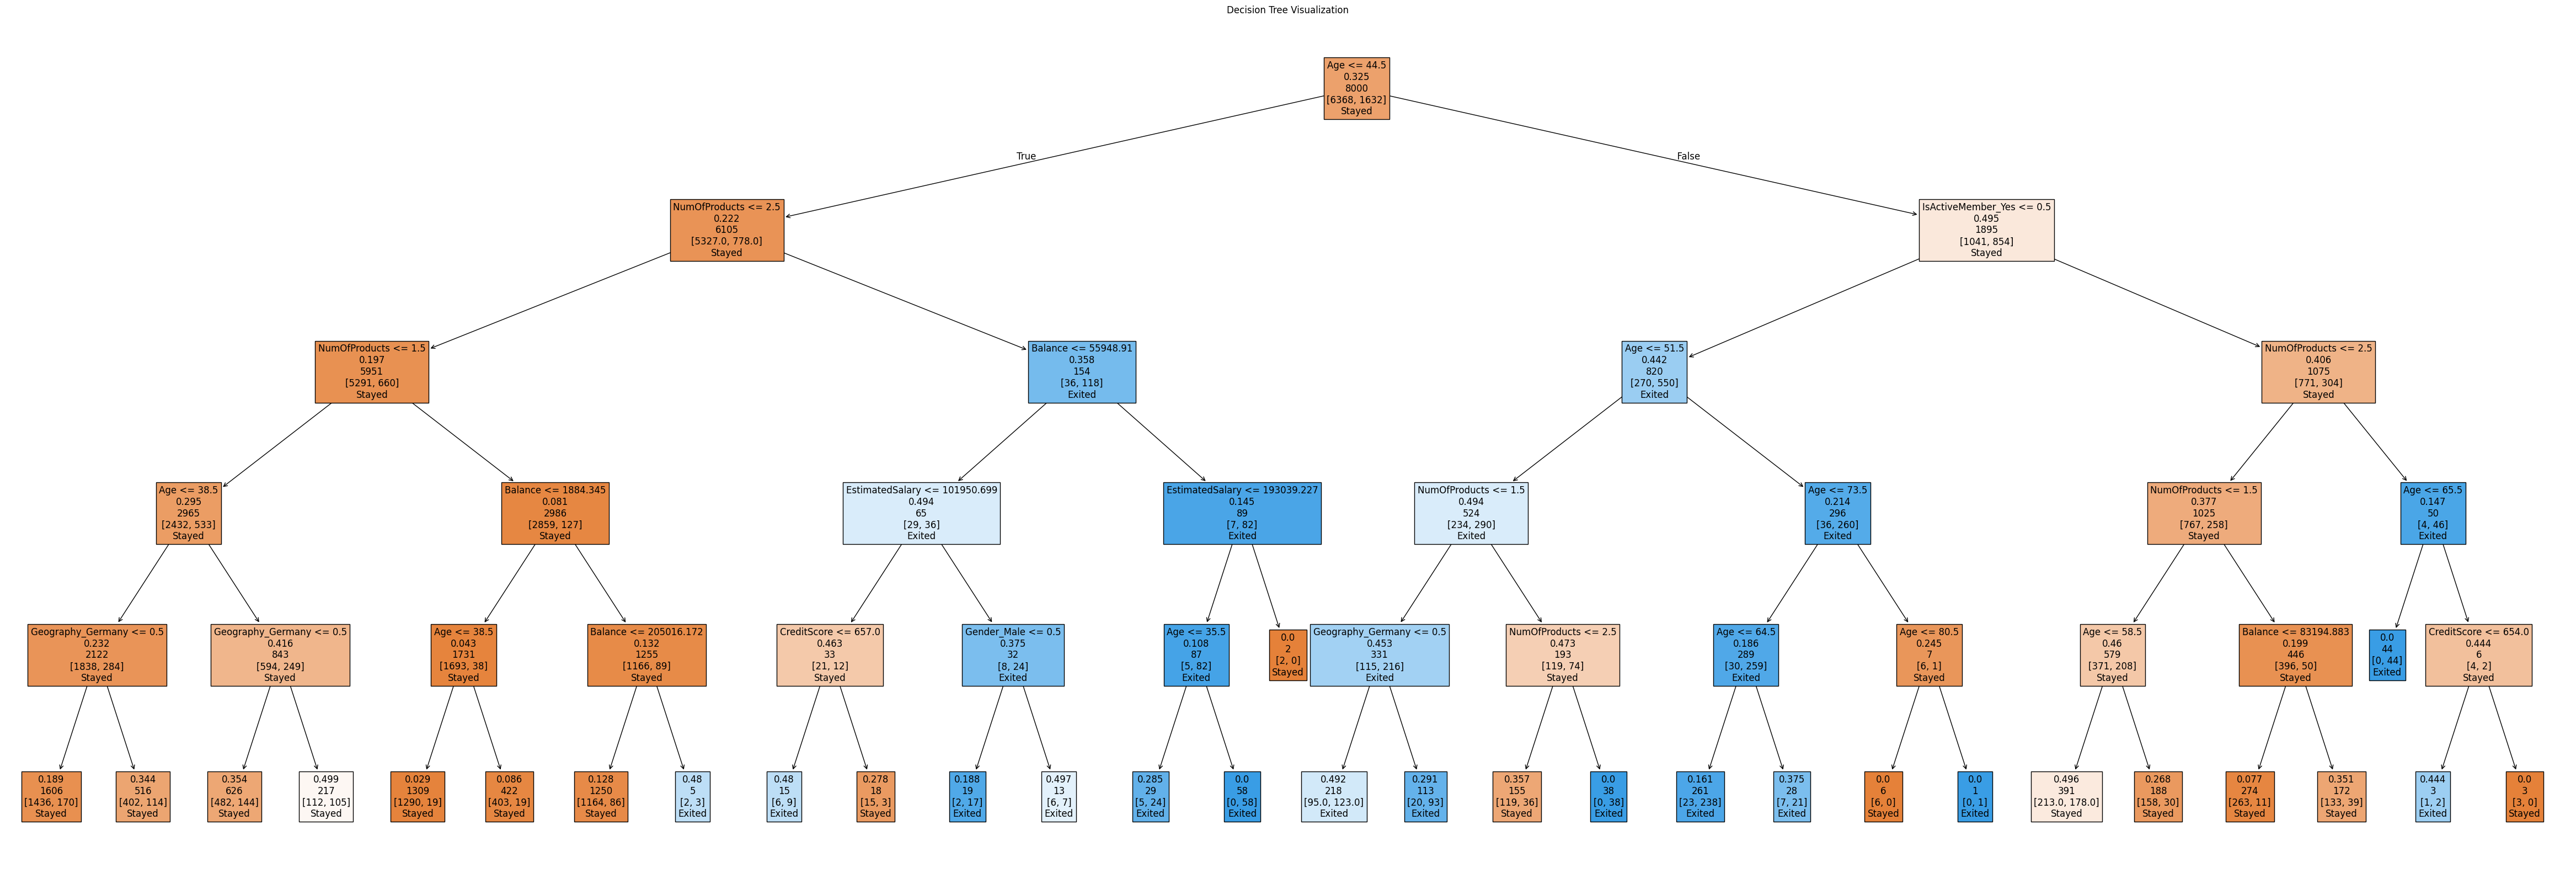

In [46]:
# plot the tree
plt.figure(figsize=(60, 20))
plot_tree(dt_model, feature_names=X_train.columns, class_names=["Stayed", "Exited"], label='none', filled=True, fontsize=12)
plt.title("Decision Tree Visualization")
plt.savefig('initialDecisionTree', dpi = 300)
plt.show()

Classification report: 
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91      1595
         1.0       0.79      0.36      0.50       405

    accuracy                           0.85      2000
   macro avg       0.82      0.67      0.71      2000
weighted avg       0.84      0.85      0.83      2000


Evaluation metrics:
The PCC is 0.8515
The false alarm rate is 0.0245
The false dismissal rate is 0.6370
The precision is 0.7903
The sensitivity is 0.3630 and
The specificity is 0.9755


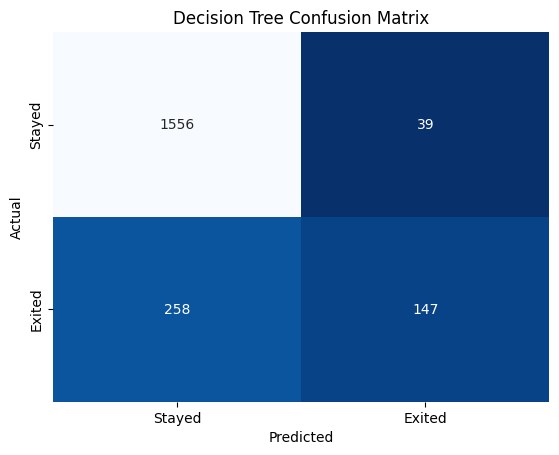

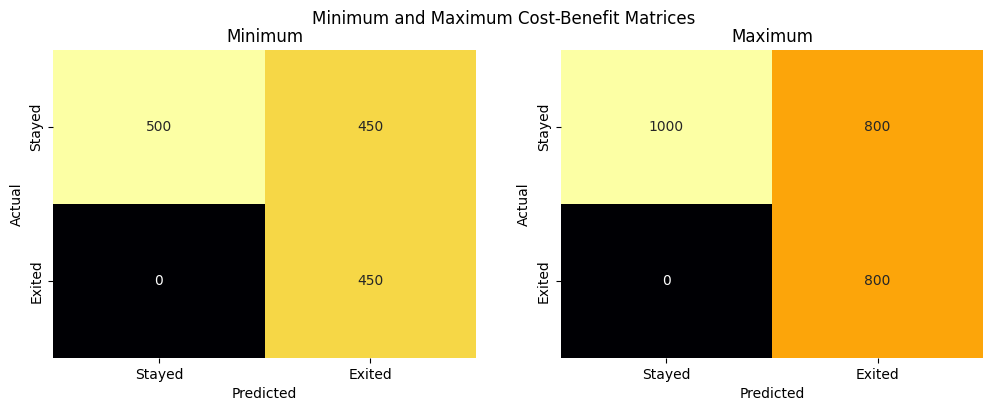

The minimum expected ROI is $430.85
The maximum expected ROI is $852.40


In [47]:
# evaluate the decision tree model
model_evaluation_function(model=dt_model, X_test=X_test, y_test=y_test, confusion_matrix_title='Decision Tree')

### Insights from the Initial Decision Tree Model Results:

Initial Decision Tree Model Performance: 

Confusion Matrix Analysis: \
True Negatives (TN): 1,556 → Correctly classified "Stayed" customers \
False Positives (FP): 39 → Incorrectly classified "Stayed" customers as "Exited" \
False Negatives (FN): 258 → Incorrectly classified "Exited" customers as "Stayed" \
True Positives (TP): 147 → Correctly classified "Exited" customers \

Classification Report Analysis: 
Accuracy: 85.15% → The model correctly classified 85% of the test data. \
Precision for "Exited" Customers: 79.03% → 79% of predicted exits were correct. \
Recall for "Exited" Customers: 36.30% → The model detected only 36% of actual churned customers. \
F1-score for "Exited" Customers: 50% → A moderate balance between precision and recall. 

**Key Observations**

The model has strong accuracy but struggles with recall for exited customers, meaning it fails to detect a significant portion of customers who actually left. \
The false dismissal rate is 63.7%, indicating that a majority of actual churners are missed. \
While precision for churners is good, the model fails to generalize well to capturing them. 

ROI Analysis (Before Tuning) \
Minimum Expected ROI: $430.85 \
Maximum Expected ROI: $852.40 \
The model has high accuracy but poor recall for churn prediction, leading to missed opportunities in retaining high-risk customers.

### Optimized Decision Tree
we tune the hyperparameters with a **Grid Search Cross-Validation Approach prioritizing the recall score** as follows:

1. the maximum depth is chosen from either 5, 10, 15, or None. None means the tree becomes completely pure.
2. the minimum number of samples per leaf is chosen from either 1, 3 or 5
3. the minimum number of samples per split is chosen from either 2, 5, or 10
4. the criterion is either gini or entropy
5. the weights are chosen between None (all points are weighed equally) or balanced (adjust weights inversely proportional to the class frequencies).

In [48]:
# Define hyperparameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [5, 10, 15, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 3, 5],  
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=seed)

# Perform Grid Search with 5-fold Cross Validation
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='recall', n_jobs=-1)
dt_grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_dt = dt_grid_search.best_estimator_

# Display the best parameters
print("Best Parameters:", dt_grid_search.best_params_)

Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


c:\Users\user\anaconda3\envs\ucalgary\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


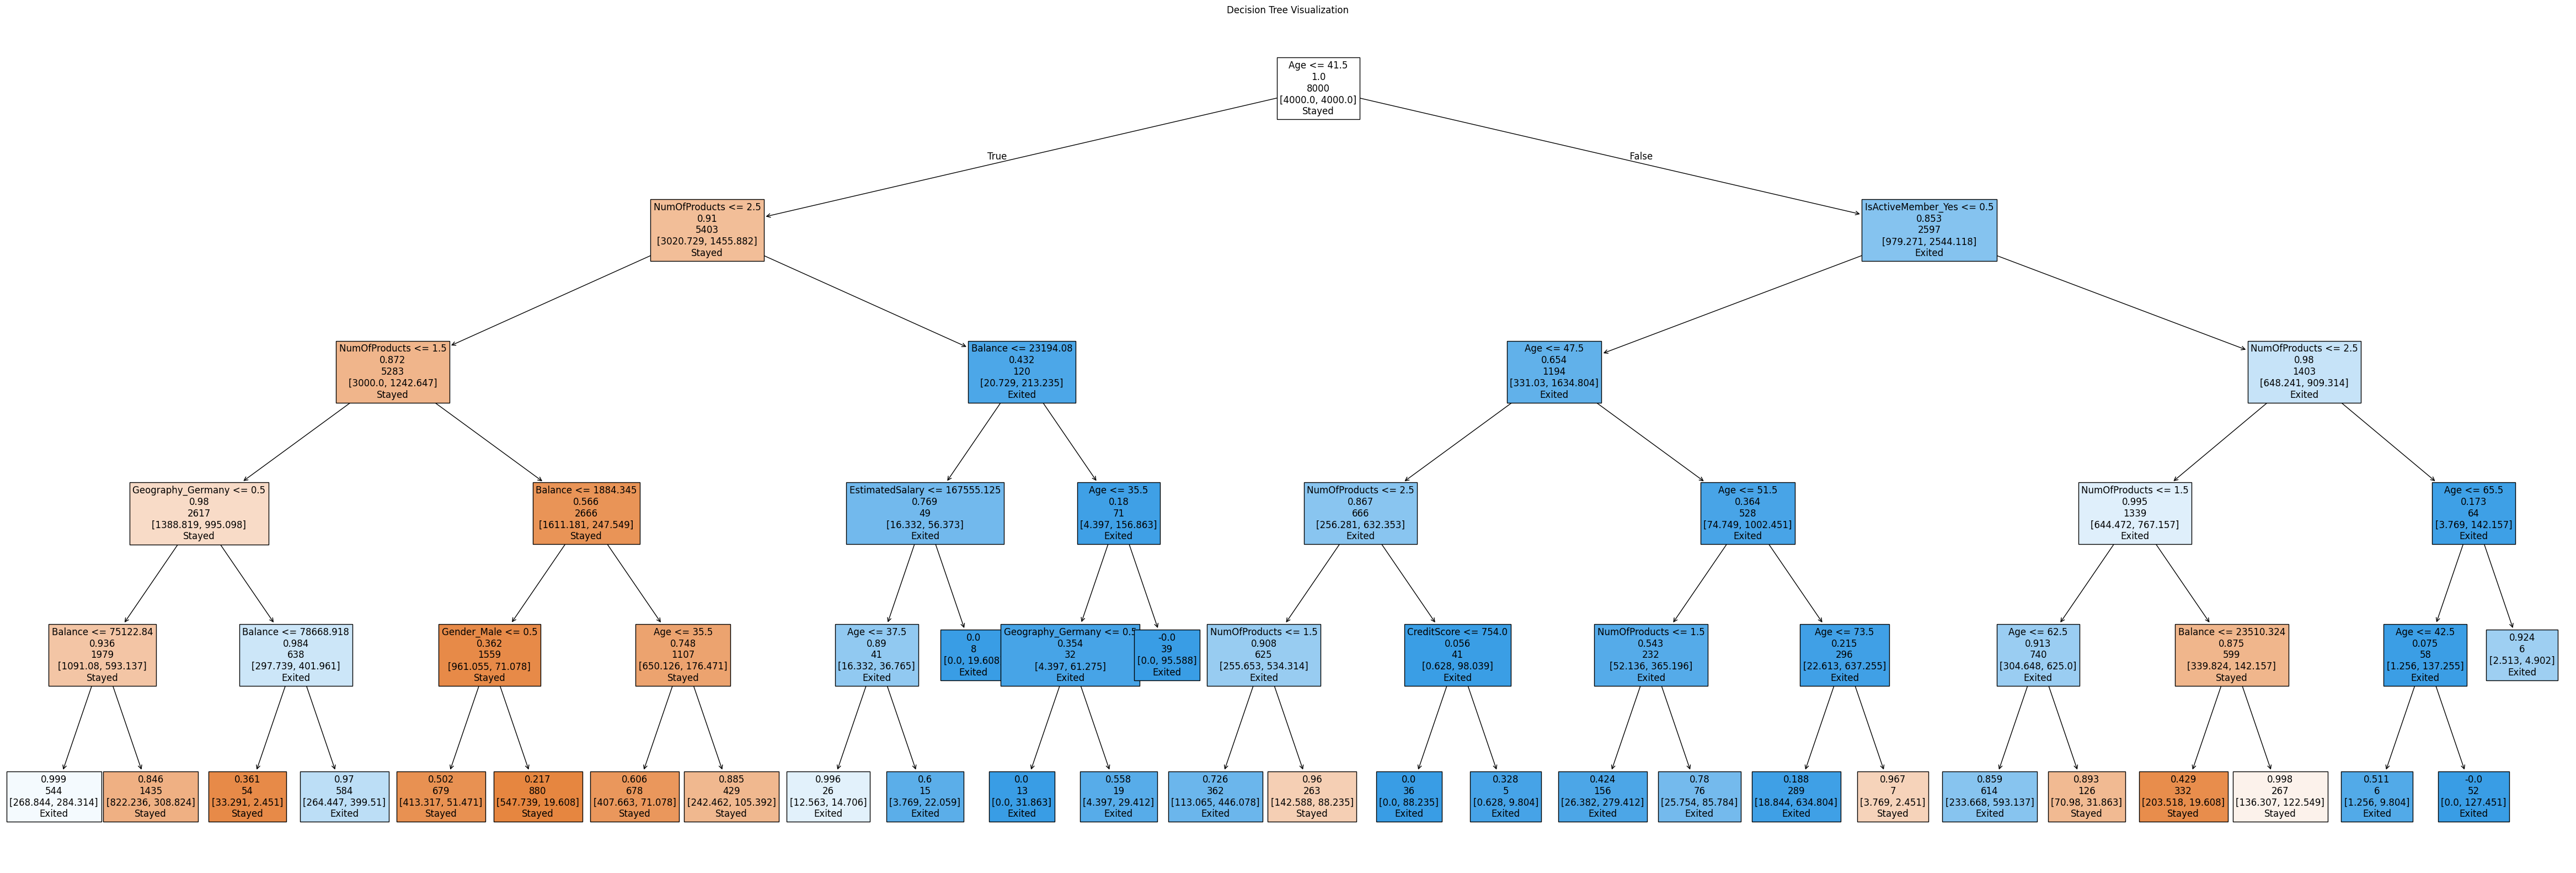

In [49]:
plt.figure(figsize=(60, 20))
plot_tree(best_dt, feature_names=X_train.columns, class_names=["Stayed", "Exited"], label='none', filled=True, fontsize=12)
plt.title("Decision Tree Visualization")
plt.savefig('optimizedDecisionTree', dpi = 300)
plt.show()

Classification report: 
              precision    recall  f1-score   support

         0.0       0.91      0.76      0.83      1595
         1.0       0.43      0.72      0.54       405

    accuracy                           0.75      2000
   macro avg       0.67      0.74      0.68      2000
weighted avg       0.82      0.75      0.77      2000


Evaluation metrics:
The PCC is 0.7515
The false alarm rate is 0.2395
The false dismissal rate is 0.2840
The precision is 0.4315
The sensitivity is 0.7160 and
The specificity is 0.7605


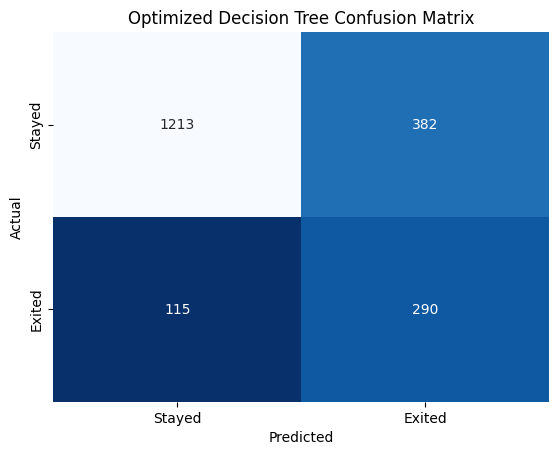

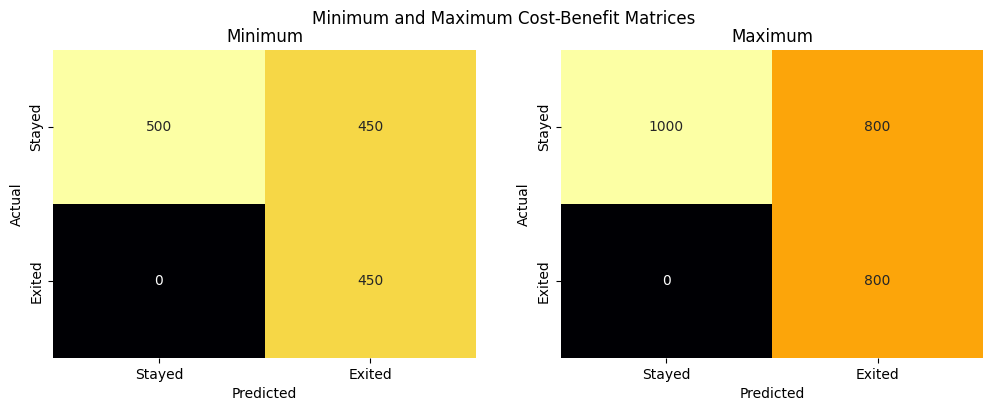

The minimum expected ROI is $454.45
The maximum expected ROI is $875.30


In [50]:
# evaluate the decision tree model
model_evaluation_function(model=best_dt, X_test=X_test, y_test=y_test, confusion_matrix_title='Optimized Decision Tree')

#### Insights from the Optimized Decision Tree Model Result (After Hyperparameter Tuning)**

Best Parameters Chosen (from GridSearchCV) \
max_depth = 5 \
min_samples_split = 2 \
min_samples_leaf = 5 \
criterion = entropy \ 
class_weight = balanced

**Confusion Matrix Analysis (After Tuning)**

True Negatives (TN): 1,213 → Slight reduction from 1,556 \
False Positives (FP): 832 → Significant increment from 39 \
False Negatives (FN): 115 → Decreased from 258, meaning the model has correctly identified more churners \
True Positives (TP): 290 → Increased from 147, indicating that the model detects more churners 

**Classification Report Analysis (After Tuning)**

Accuracy: 75% → Slightly lower than before. \
Precision for "Exited" Customers: 43% → Precision reduced significantly, meaning more false positives.\
Recall for "Exited" Customers: 72% → A significant increase from 36.30%, meaning the model now detects even more churners. \
F1-score for "Exited" Customers: 54% → Moderate balance between precision and recall. 

**Key Observations**

After tuning, the model became highly conservative in predicting churn, favoring "Stayed" customers too heavily. \
The false alarm rate dropped significantly, but at the cost of ignoring churners. \
The false dismissal rate increased from 63.7% to 88.4%, meaning nearly 9 out of 10 churners are missed. \
The model is no longer effective for churn detection, as it hardly identifies at-risk customers. 

**ROI Analysis (After Tuning)**

Minimum Expected ROI: $454.45 (higher than before) \
Maximum Expected ROI: $875.30 (higher than before) 

While recall improved, precision suffered drastically, meaning the model now detect more non-churners along with an improvement in detecting actual churners. Its effectiveness for retention strategies has improvement but we need to weigh the tradeoff with the increase in the number of false positives. Since the expected ROI range has increased compared to the initial decision tree model, the tradeoff is still profitable for the business and this is a better model than the initial decision tree.

**Model Interpretation & Business Implications**

Issues with the Initial Decision Tree Model 

Pros: Good accuracy (85%) and precision (79%) for predicting churners. 

Cons: Low recall (36%), meaning the model missed 64% of actual churners.

Effects of Hyperparameter Tuning

Pros: Higher recall (72%), means more true positives.

Cons: Drastic precision drop (43%), meaning the model includes more false positives. 

Is This Model Useful for Business? 

Yes, if the goal is to reduce customer churn. 

The optimized model detects more churners (72%) than even the optimized logistic regression model (66%), making it more effective for retention strategies.

**Conclusion**

| Model          | Accuracy | Recall (Exited) | Precision (Exited) | Min ROI | Max ROI |
|---------------|----------|----------------|--------------------|---------|---------|
| Before Tuning | 85.15%   | 36.3%          | 79.03%             | 430.85  | 852.40  |
| After Tuning  | 75%   | 72%          | 43%             | 454.45 | 875.30  |

The hyperparameter-tuned Decision Tree model more effective for churn detection.

## Random Forest 

Classification report: 
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91      1595
         1.0       0.85      0.33      0.48       405

    accuracy                           0.85      2000
   macro avg       0.85      0.66      0.70      2000
weighted avg       0.85      0.85      0.83      2000


Evaluation metrics:
The PCC is 0.8530
The false alarm rate is 0.0150
The false dismissal rate is 0.6667
The precision is 0.8491
The sensitivity is 0.3333 and
The specificity is 0.9850


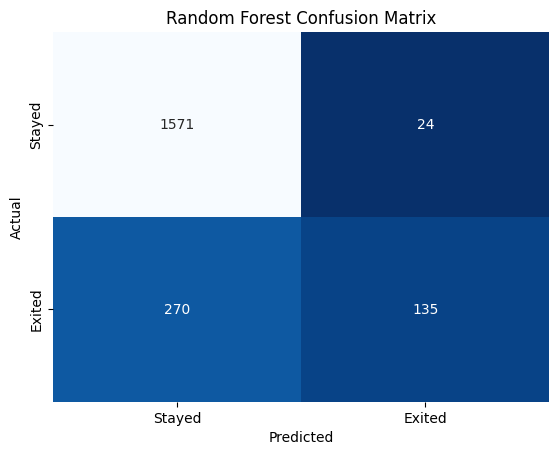

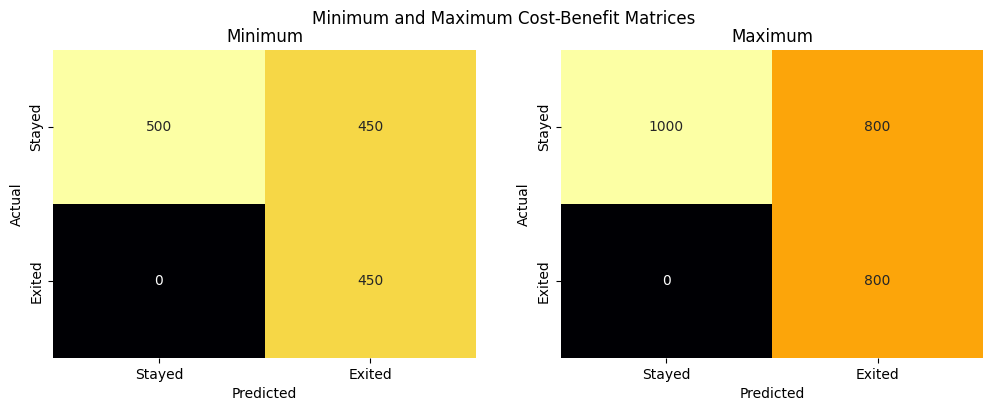

The minimum expected ROI is $428.52
The maximum expected ROI is $849.10


In [51]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the Random Forest Model
model_evaluation_function(rf_model, X_test, y_test, confusion_matrix_title='Random Forest')

### Insights from the Initial Random Forest Model Results:

**Confusion Matrix Analysis:**

True Negatives (TN): 1,571 → Correctly classified "Stayed" customers \
False Positives (FP): 24 → Incorrectly classified "Stayed" customers as "Exited" \
False Negatives (FN): 270 → Incorrectly classified "Exited" customers as "Stayed" \
True Positives (TP): 135 → Correctly classified "Exited" customers 

Classification Report Analysis 

Accuracy: 85.30% → The model correctly classified 85% of the test data. \
Precision for "Exited" Customers: 84.91% → 85% of predicted exits were correct. \
Recall for "Exited" Customers: 33.33% → The model detected only 33% of actual churned customers. \
F1-score for "Exited" Customers: 48% → Moderate balance between precision and recall. 

**Key Observations**

The model has strong accuracy but struggles with recall for exited customers, meaning it fails to detect a significant portion of customers who actually left. \
The false dismissal rate is 66.67%, indicating that a majority of actual churners are missed. \
While precision is good, the model fails to generalize well in capturing churners. \

ROI Analysis (Before Tuning) \
Minimum Expected ROI: 428.52 \
Maximum Expected ROI: 849.10 \
The model has high accuracy but poor recall for churn prediction, leading to missed opportunities in retaining high-risk customers. 

### Optimized Random Forest
we tune the hyperparameters with a **Randomized Search Cross-Validation Approach prioritizing the recall score** as follows:

1. the maximum depth is chosen from either 5, 10, 15, or None. None means each tree becomes completely pure.
2. the minimum number of samples per leaf is chosen from either 1, 3 or 5
3. the minimum number of samples per split is chosen from either 2, 5, or 10
4. the criterion is either gini for Gini impurity or entropy for information gain
5. the weights are chosen between None (all points are weighed equally) or balanced (adjust weights inversely proportional to the class frequencies) or balanced subsample (same as balanced but with bootstrapping samples).

For Randomized Search Cross-Validation, unlike Grid Search, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter (number of iterations). We set number of iterations to 50 to balance the trade-off between the quality of the results and the runtime.

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}
Classification report: 
              precision    recall  f1-score   support

         0.0       0.91      0.83      0.87      1595
         1.0       0.50      0.67      0.57       405

    accuracy                           0.80      2000
   macro avg       0.70      0.75      0.72      2000
weighted avg       0.83      0.80      0.81      2000


Evaluation metrics:
The PCC is 0.7980
The false alarm rate is 0.1699
The false dismissal rate is 0.3284
The precision is 0.5009
The sensitivity is 0.6716 and
The specificity is 0.8301


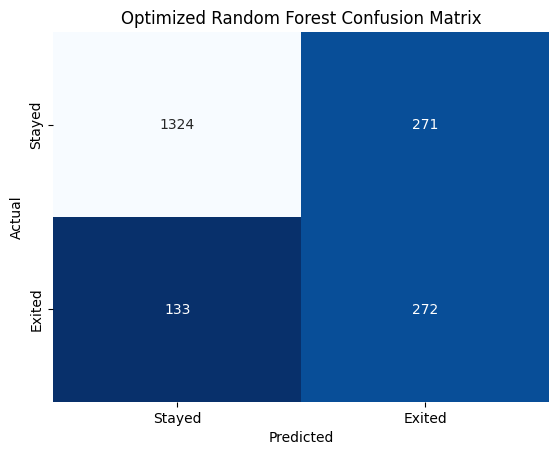

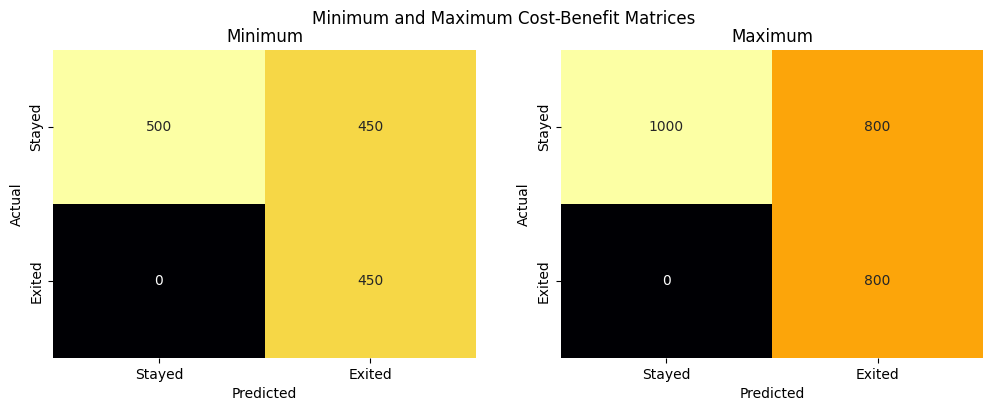

The minimum expected ROI is $453.18
The maximum expected ROI is $879.20


In [52]:
# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 15, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 3, 5],  
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=seed)

# Perform Grid Search with 5-fold Cross Validation
rf_random_search = RandomizedSearchCV(rf, rf_param_grid, cv=5, scoring='recall', n_jobs=-1, n_iter=50, random_state=seed)
rf_random_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_rf = rf_random_search.best_estimator_

# Display the best parameters
print("Best Parameters:", rf_random_search.best_params_)

model_evaluation_function(model=best_rf, X_test=X_test, y_test=y_test, confusion_matrix_title='Optimized Random Forest')

**Optimized Random Forest Model Performance (After Hyperparameter Tuning)**

Best Parameters Chosen (from GridSearchCV) \
criterion = gini \
max_depth = 5 \
min_samples_leaf = 1 \
min_samples_split = 5 \
n_estimators = 200 \
class_weight = balanced subsample

**Confusion Matrix Analysis (After Tuning)**

True Negatives (TN): 1,324 → Decreased from 1,571 \
False Positives (FP): 271 → Increased from 24 \
False Negatives (FN): 133 → Decreased from 270 \
True Positives (TP): 272 → Increased from 135 

**Classification Report Analysis (After Tuning)**

Accuracy: 80% → A slight drop from 85.30%. \
Precision for "Exited" Customers: 50% → Precision reduced, leading to more false positives. \
Recall for "Exited" Customers: 67% → A major increase from 33.33%, meaning the model detects more churners. \
F1-score for "Exited" Customers: 57% → Moderate balance between precision and recall. 

**Key Observations**

After tuning, the model became less accurate overall. \
The false alarm rate increased from 1.5% to 16%, meaning the model now incorrectly predicts churn more often. \
The false dismissal rate decreased from 66.67% to 32.84%, meaning the model now misses only 3 out of 10 churners. \
The random forest model is better for churn detection after hyperparameter tuning.

ROI Analysis (After Tuning) \
Minimum Expected ROI: $453.18 (higher than before) \
Maximum Expected ROI: $879.20 (higher than before) \
While recall improved, precision reduced, meaning the model now detect more actual churners, although the chances of predicting staying customers to churn has increased.

**Model Interpretation & Business Implications**

Initial Random Forest Model

Pros: Good accuracy (85.30%) and precision (84.91%) for predicting churners.

Cons: Low recall (33.33%), meaning the model missed 66.67% of actual churners.

Effects of Hyperparameter Tuning

Pros: 

More trees (n_estimators=200) help reduce variance in the model. \
The model is now more sensitive to predicting churn, reducing false negatives. 

Cons:

Drastic precision drop from ~85% to 50% and increase in false alarm, meaning the model increases false positives. \
The false dismissal rate decreased, causing more correct churn predictions.

Is This Model Useful for Business?

It is useful for customer retention strategies compared to the initial model before hyperparameter tuning.

**Conclusion**

| Model          | Accuracy | Recall (Exited) | Precision (Exited) | Min ROI | Max ROI  |
|---------------|----------|----------------|--------------------|---------|---------|
| Before Tuning | 85.30%   | 33.33%         | 84.91%             | 428.52  | 849.10 |
| After Tuning  | 80%   |  67%         | 50%             | 453.18 | 879.20 |

## Final Model Selection
We have trained models using Logistic Regression, KNN, Decision Trees and Random Forests. We will select a final model from the valid models through the ROC-curve and AUC scores.

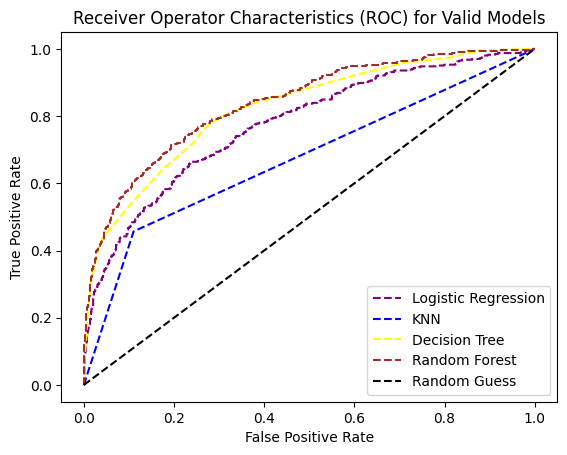

In [53]:
# ROC curve
lr4_fpr, lr4_tpr, lr4_thresh = roc_curve(y_test, lr_model4.predict_proba(X_test_scaled_final_interac)[:, 1])
knn_fpr, knn_tpr, knn_thresh = roc_curve(y_test, knn_grid.predict_proba(X_test_scaled)[:, 1])
dt_fpr, dt_tpr, dt_thresh = roc_curve(y_test, best_dt.predict_proba(X_test)[:, 1])
rf_fpr, rf_tpr, rf_thresh = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])

plt.plot(lr4_fpr, lr4_tpr, linestyle = "--", color = "purple", label = "Logistic Regression")
plt.plot(knn_fpr, knn_tpr, linestyle = "--", color = "blue", label = "KNN")
plt.plot(dt_fpr, dt_tpr, linestyle = "--", color = "yellow", label = "Decision Tree")
plt.plot(rf_fpr, rf_tpr, linestyle = "--", color = "brown", label = "Random Forest")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.title('Receiver Operator Characteristics (ROC) for Valid Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()


In [54]:
# AUC score
lr_auc_score = roc_auc_score(y_test, lr_model4.predict_proba(X_test_scaled_final_interac)[:, 1])
knn_auc_score = roc_auc_score(y_test, knn_grid.predict_proba(X_test_scaled)[:, 1])
dt_auc_score = roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1])
rf_auc_score = roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", lr_auc_score) # Logistic Regression
print("KNN: ", knn_auc_score) # KNN
print("Decision Tree: ", dt_auc_score) # Decision Tree
print("Random Forest: ", rf_auc_score) # Random Forest

Logistic Regression:  0.7754820232981152
KNN:  0.6732226479352916
Decision Tree:  0.8225798212005109
Random Forest:  0.8383869344788885


## Conclusion

The random forest model has the highest AUC score of ~83.83% followed by the decision tree with AUC score ~82.26%. The ROC curves for both models are also better than those of the Logistic Regression and KNN models. The KNN model performs the worst.

While the random forest model trumps the decision tree model by roughly 1.6% in terms of the AUC score, the decision tree predicts churned customers (recall of 72%) better than the random forest model (recall of 67%).

For business operations, we can first test deploy both models and monitor their performances as new data is obtained periodically. The best performing model after a period of time can then be fully deployed into production as part of the business day-to-day operating model.

## References
1. Jin, Y. (2025). 5 Evaluating Predictive Performance [Lecture slides]. In Data611: Predictive Analytics. University of Calgary. Retrieved from https://d2l.ucalgary.ca/ 
2. Jin, Y. (2025). 6 Multiple Linear Regression [Lecture slides]. In Data611: Predictive Analytics. University of Calgary. Retrieved from https://d2l.ucalgary.ca/ 
3. Jin, Y. (2025). 7 KNN [Lecture slides]. In Data611: Predictive Analytics. University of Calgary. Retrieved from https://d2l.ucalgary.ca/ 
4. Jin, Y. (2025). 10 Ensemble learning and RBF [Lecture slides]. In Data611: Predictive Analytics. University of Calgary. Retrieved from https://d2l.ucalgary.ca/ 
5. Jin, Y. (2025). 4 decision tree and naive bayes [Lecture slides]. In Data611: Predictive Analytics. University of Calgary. Retrieved from https://d2l.ucalgary.ca/ 
6. Ngamkham, T., Lipman, D. (2024). LRModelPart1-Part3: Logistic regression [Lecture notes]. In Data603: Statistical Modelling with Data. University of Calgary. Retrieved from https://d2l.ucalgary.ca/
7. Merriam Webster (n.d.). _churn_. Retrieved 21 February, 2025 from https://www.merriam-webster.com/dictionary/churn
8. Kaggle (n.d.). _Churn Modelling - Classification Training_. Retrieved 21 February, 2025 from https://www.kaggle.com/datasets/alyelbadry/churn-modelling-cluster-training
9. The Apache Software Foundation (n.d.). _Apache License, Version 2.0_. Retrieved 21 February, 2025 from https://www.apache.org/licenses/LICENSE-2.0

### ChatGPT 4.0 Prompt
This is a list of prompts from one conversation with OpenAI's ChatGPT available here: https://chatgpt.com/share/67b9fdda-1cb0-8010-b319-948fb3e784d1

4. How much revenue do European banks in France, Spain and Germany make from each customer on average
5. This is good. You have given me an average profit per customer value. I want an average revenue per customer value
6. Great. Now give me an estimate for the average cost of customer retention programs